In [ ]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install bayesian-optimization

In [ ]:
vg_values = [0.0, 0.0241, 0.0483, 0.0724, 0.0966, 0.1207, 0.1448, 0.169, 0.1931, 0.2172, 0.2414, 0.2655, 0.2897, 0.3138, 0.3379, 0.3621, 0.3862, 0.4103, 0.4345, 0.4586, 0.4828, 0.5069, 0.531, 0.5552, 0.5793, 0.6034, 0.6276, 0.6517, 0.6759, 0.7]
# d=pd.read_csv('srip_fulldata.csv')
df=pd.read_csv('/content/SRIP_pivot_dataset.csv')
df

Unnamed: 0      L       W          id_1          id_2          id_3  \
0             0  0.012  0.0200  6.410000e-10  1.080000e-09  1.800000e-09   
1             1  0.012  0.0210  6.420000e-10  1.080000e-09  1.810000e-09   
2             2  0.012  0.0221  6.440000e-10  1.080000e-09  1.810000e-09   
3             3  0.012  0.0231  6.450000e-10  1.090000e-09  1.820000e-09   
4             4  0.012  0.0241  6.470000e-10  1.090000e-09  1.820000e-09   
..          ...    ...     ...           ...           ...           ...   
895         895  0.025  0.0459  4.600000e-10  8.090000e-10  1.350000e-09   
896         896  0.025  0.0469  4.610000e-10  8.110000e-10  1.360000e-09   
897         897  0.025  0.0479  4.620000e-10  8.130000e-10  1.360000e-09   
898         898  0.025  0.0490  4.640000e-10  8.150000e-10  1.360000e-09   
899         899  0.025  0.0500  4.650000e-10  8.180000e-10  1.370000e-09   

             id_4          id_5          id_6          id_7  ...     id_21  \
0    3.000000e-09  4.990000e-09  8.260000e-09  1.360000e-08  ...  0.000007   
1    3.010000e-09  5.000000e-09  8.280000e-09  1.370000e-08  ...  0.000007   
2    3.020000e-09  5.020000e-09  8.300000e-09  1.370000e-08  ...  0.000007   
3    3.020000e-09  5.030000e-09  8.320000e-09  1.370000e-08  ...  0.000007   
4    3.030000e-09  5.040000e-09  8.340000e-09  1.380000e-08  ...  0.000007   
..            ...           ...           ...           ...  ...       ...   
895  2.250000e-09  3.750000e-09  6.220000e-09  1.030000e-08  ...  0.000006   
896  2.260000e-09  3.760000e-09  6.230000e-09  1.030000e-08  ...  0.000006   
897  2.270000e-09  3.770000e-09  6.250000e-09  1.030000e-08  ...  0.000006   
898  2.270000e-09  3.780000e-09  6.260000e-09  1.030000e-08  ...  0.000006   
899  2.280000e-09  3.790000e-09  6.280000e-09  1.040000e-08  ...  0.000006   

        id_22     id_23     id_24     id_25     id_26     id_27     id_28  \
0    0.000009  0.000011  0.000014  0.000017  0.000022  0.000027  0.000033   
1    0.000009  0.000011  0.000014  0.000017  0.000022  0.000027  0.000033   
2    0.000009  0.000011  0.000014  0.000017  0.000022  0.000027  0.000033   
3    0.000009  0.000011  0.000014  0.000017  0.000022  0.000027  0.000033   
4    0.000009  0.000011  0.000014  0.000017  0.000022  0.000027  0.000033   
..        ...       ...       ...       ...       ...       ...       ...   
895  0.000008  0.000010  0.000013  0.000016  0.000019  0.000024  0.000030   
896  0.000008  0.000010  0.000013  0.000016  0.000019  0.000024  0.000030   
897  0.000008  0.000010  0.000013  0.000016  0.000020  0.000024  0.000030   
898  0.000008  0.000010  0.000013  0.000016  0.000020  0.000024  0.000030   
899  0.000008  0.000010  0.000013  0.000016  0.000020  0.000024  0.000030   

        id_29     id_30  
0    0.000038  0.000041  
1    0.000038  0.000041  
2    0.000038  0.000041  
3    0.000039  0.000041  
4    0.000039  0.000041  
..        ...       ...  
895  0.000035  0.000038  
896  0.000035  0.000039  
897  0.000036  0.000039  
898  0.000036  0.000039  
899  0.000036  0.000039  

[900 rows x 33 columns]

In [ ]:
ids = df.loc[:, 'id_1':'id_30'].values
y = np.log(ids)

dta = np.array([df['L'], df['W']]).T
x = dta

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((720, 2), (720, 30), (180, 2), (180, 30))

# FARWARD MODEL USING PYTORCH

In [ ]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        # Define the layers of your model
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc4=nn.Linear(128,64)
        self.fc5=nn.Linear(64,30)
        # Adjust the output size to match the number of ID columns
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x=self.fc3(x)
        x = self.relu(x)
        x=self.fc4(x)
        x = self.relu(x)
        x=self.fc5(x)
#       output_id = self.fc3_id(x)
        return x


X_train_tensor = torch.Tensor(X_train)
Y_train_tensor = torch.Tensor(Y_train)
X_test_tensor = torch.Tensor(X_test)
Y_test_tensor = torch.Tensor(Y_test)
X_train_tensor.shape

torch.Size([720, 2])

In [ ]:
model = MyModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=5e-5)

batch_size = 32
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor[:, :30])  # Keep only ID columns in the target tensor
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor[:, :30])  # Keep only ID columns in the target tensor
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

num_epochs = 300
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Clear the gradients
        outputs_id = model(inputs)  # Forward pass (ID prediction only)
        loss = criterion(outputs_id, targets)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update the weights

    # Evaluate the model
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        test_loss = 0.0
        for inputs, targets in test_loader:
            outputs_id = model(inputs)  # Forward pass (ID prediction only)
            test_loss += criterion(outputs_id, targets)  # Compute the loss

    print(f"Epoch [{epoch+1}/{num_epochs}], Test Loss: {test_loss.item() / len(test_loader):.4f}")

Epoch [1/300], Test Loss: 228.2379
Epoch [2/300], Test Loss: 227.9976
Epoch [3/300], Test Loss: 227.7134
Epoch [4/300], Test Loss: 227.3430
Epoch [5/300], Test Loss: 226.8068
Epoch [6/300], Test Loss: 225.9734
Epoch [7/300], Test Loss: 224.7134
Epoch [8/300], Test Loss: 222.8237
Epoch [9/300], Test Loss: 219.9383
Epoch [10/300], Test Loss: 215.6876
Epoch [11/300], Test Loss: 209.6624
Epoch [12/300], Test Loss: 201.4704
Epoch [13/300], Test Loss: 190.7675
Epoch [14/300], Test Loss: 177.3102
Epoch [15/300], Test Loss: 161.0359
Epoch [16/300], Test Loss: 142.1923
Epoch [17/300], Test Loss: 121.4163
Epoch [18/300], Test Loss: 99.7329
Epoch [19/300], Test Loss: 78.5410
Epoch [20/300], Test Loss: 59.2937
Epoch [21/300], Test Loss: 43.3149
Epoch [22/300], Test Loss: 31.2009
Epoch [23/300], Test Loss: 22.6934
Epoch [24/300], Test Loss: 16.9901
Epoch [25/300], Test Loss: 13.1626
Epoch [26/300], Test Loss: 10.4981
Epoch [27/300], Test Loss: 8.5433
Epoch [28/300], Test Loss: 7.0247
Epoch [29/300]

In [ ]:
import pickle
filename = "ANN_forward_model.pkl"
pickle.dump(model, open(filename,'wb'))

tensor([0.0129, 0.0303])


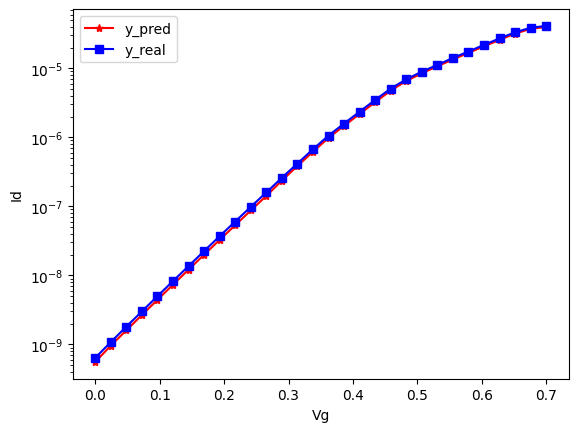

tensor([0.0241, 0.0376])


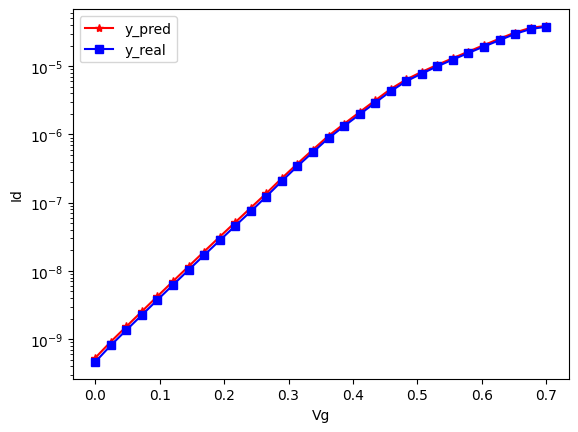

tensor([0.0151, 0.0417])


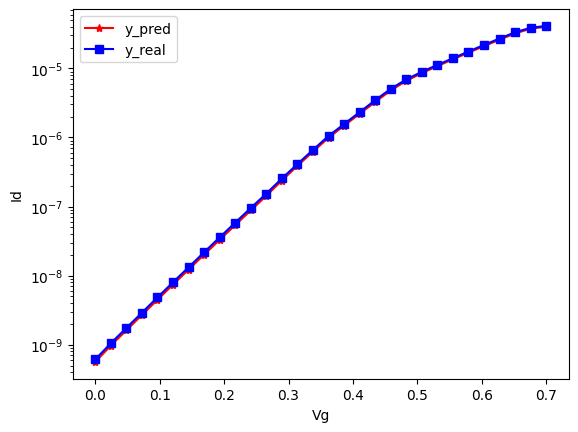

tensor([0.0205, 0.0386])


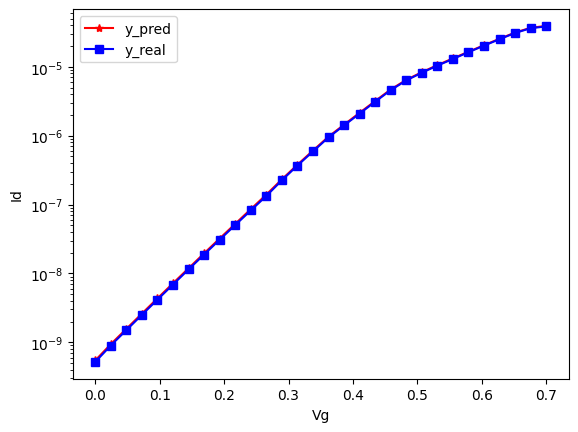

tensor([0.0124, 0.0293])


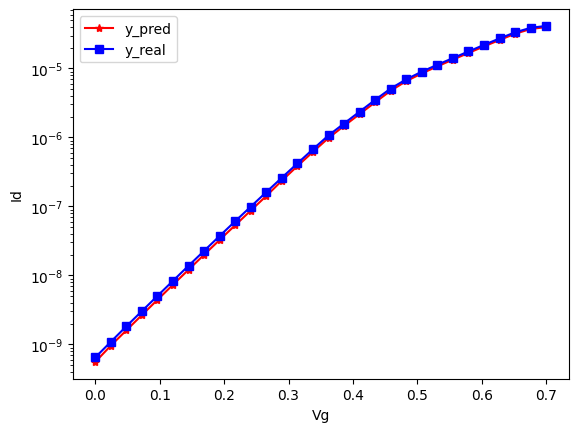

tensor([0.0228, 0.0314])


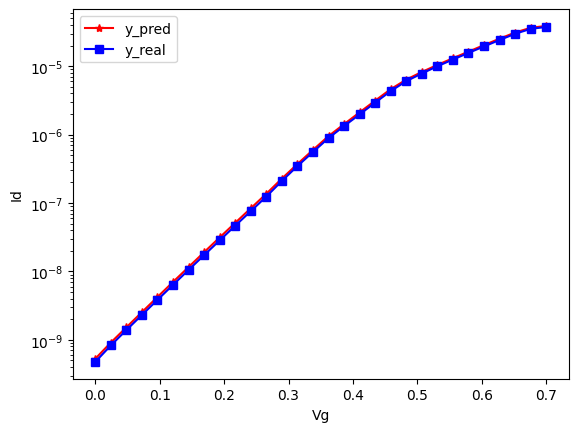

tensor([0.0160, 0.0500])


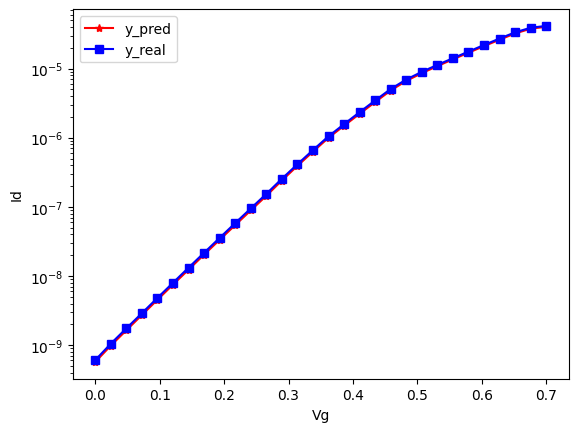

tensor([0.0133, 0.0407])


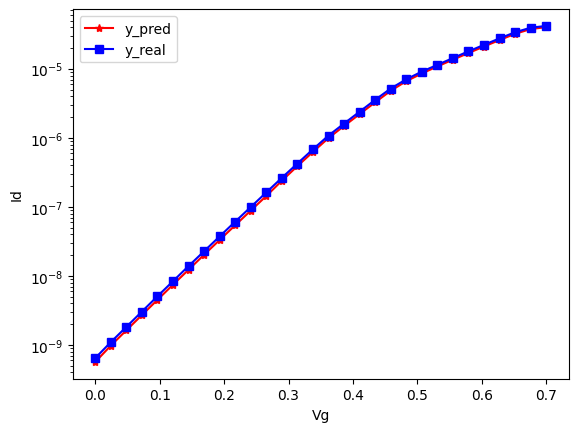

tensor([0.0129, 0.0324])


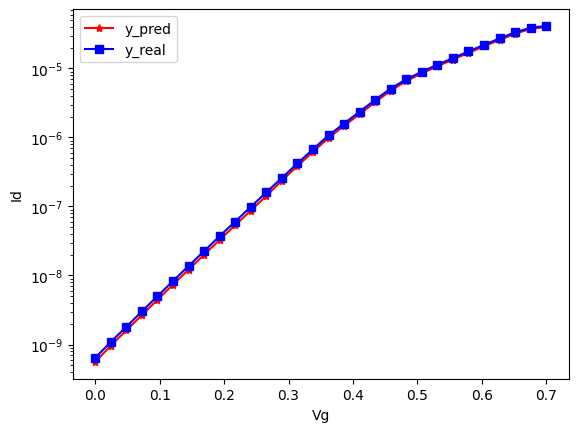

tensor([0.0129, 0.0469])


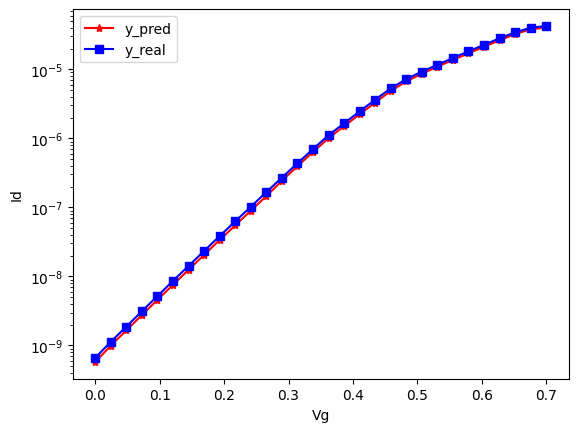

tensor([0.0138, 0.0397])


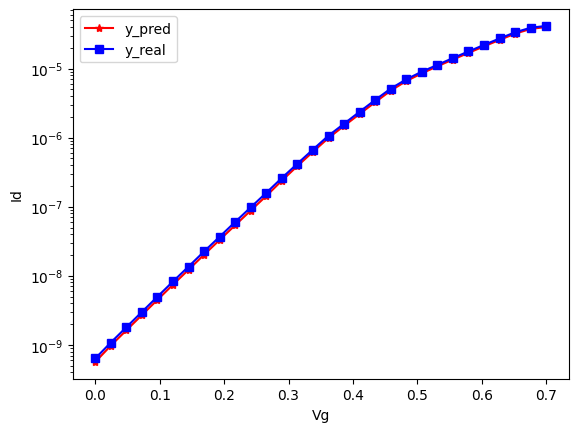

tensor([0.0196, 0.0438])


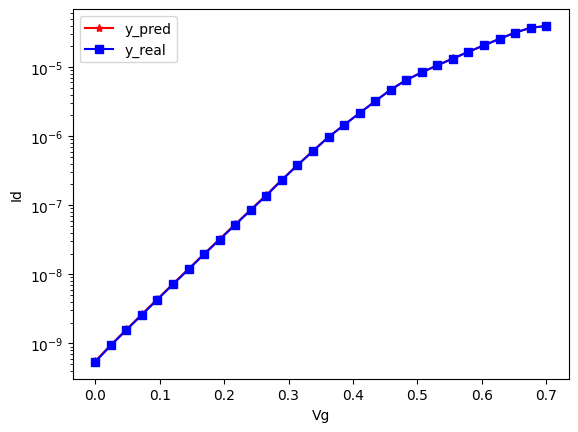

tensor([0.0237, 0.0417])


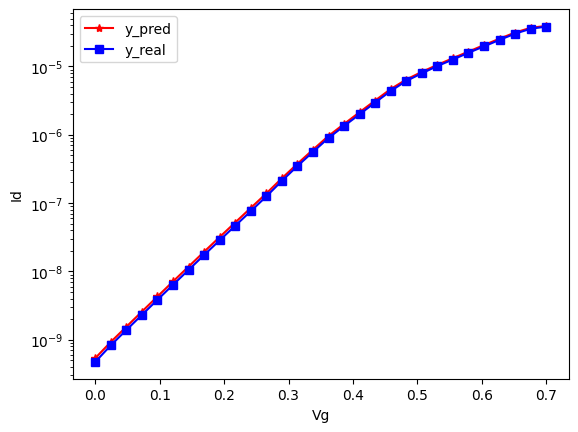

tensor([0.0138, 0.0200])


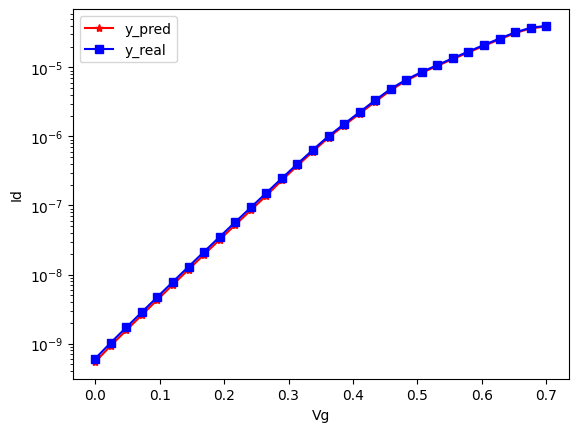

tensor([0.0223, 0.0417])


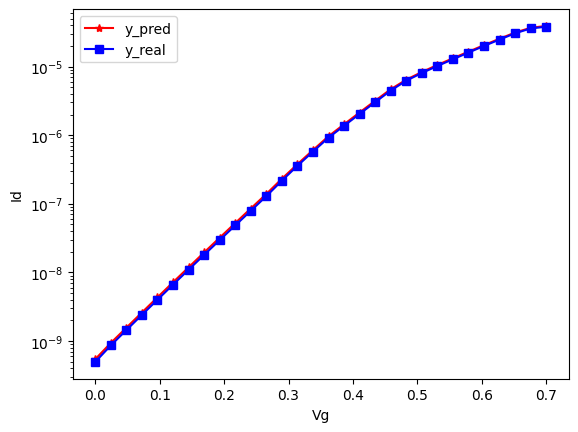

tensor([0.0205, 0.0407])


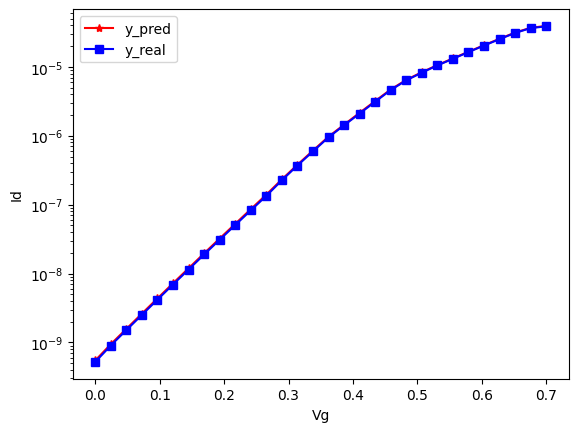

tensor([0.0142, 0.0386])


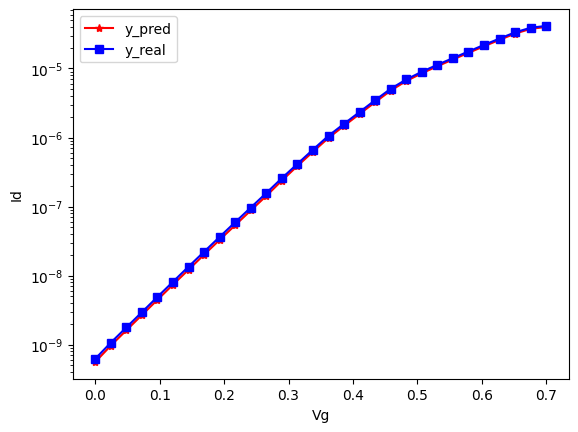

tensor([0.0183, 0.0221])


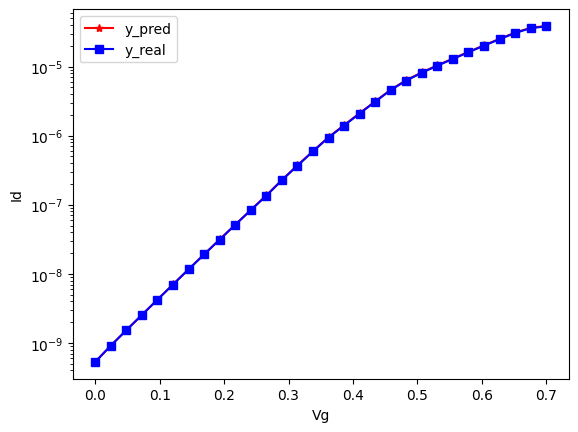

tensor([0.0183, 0.0479])


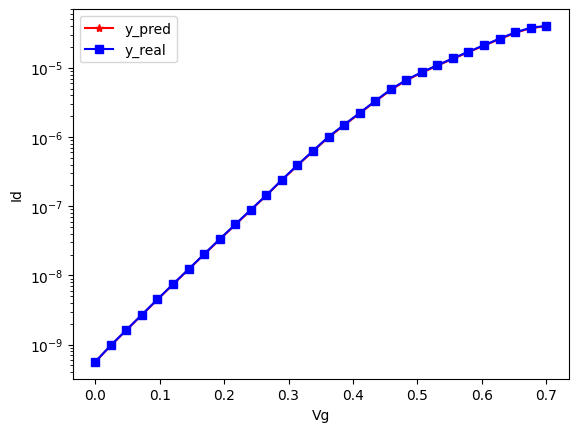

tensor([0.0129, 0.0272])


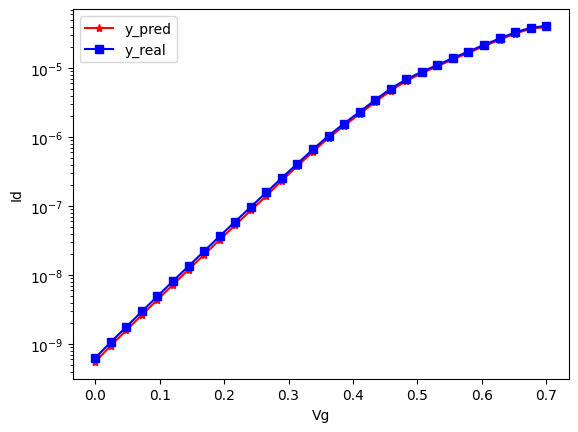

tensor([0.0151, 0.0210])


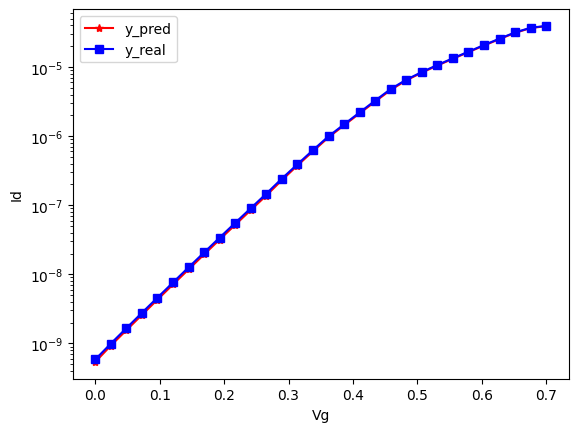

tensor([0.0228, 0.0417])


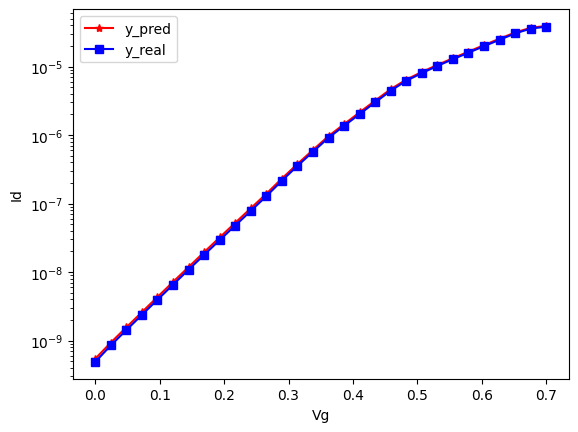

tensor([0.0219, 0.0490])


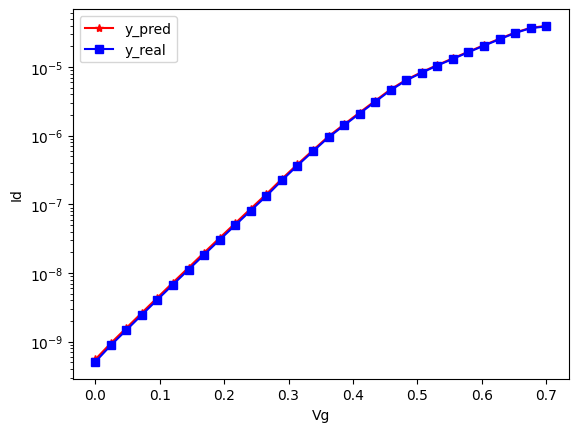

tensor([0.0169, 0.0231])


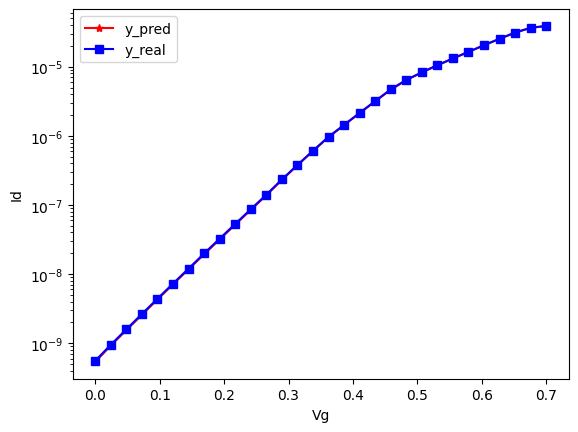

tensor([0.0201, 0.0221])


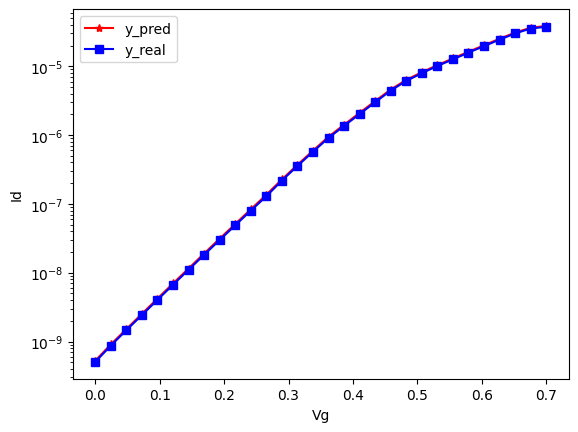

tensor([0.0169, 0.0345])


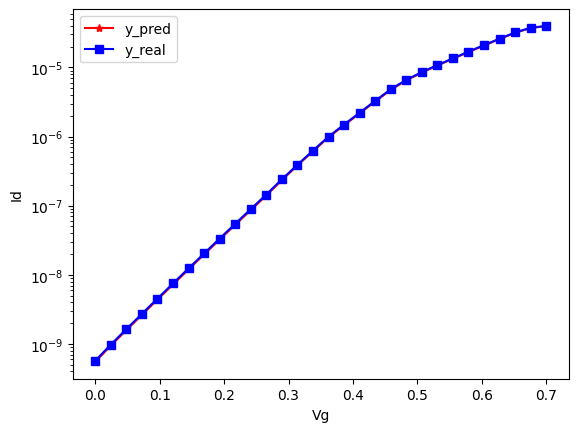

tensor([0.0124, 0.0200])


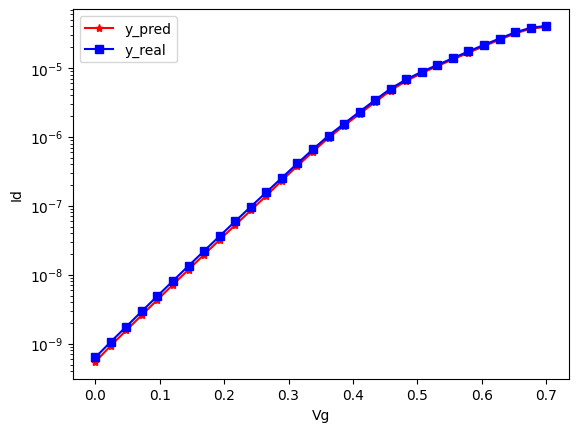

tensor([0.0241, 0.0479])


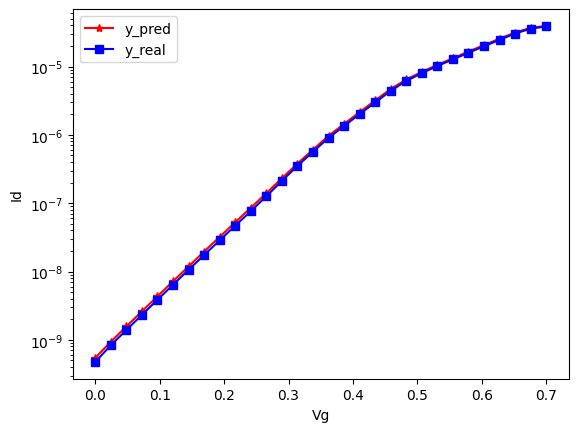

tensor([0.0214, 0.0490])


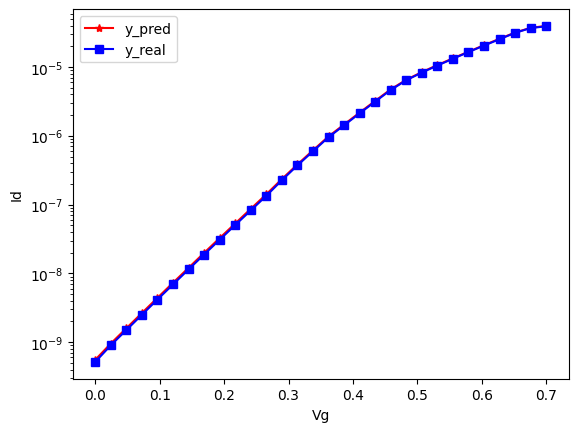

tensor([0.0196, 0.0324])


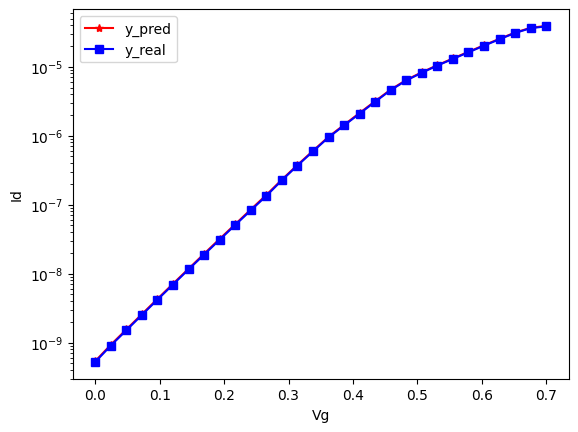

tensor([0.0156, 0.0407])


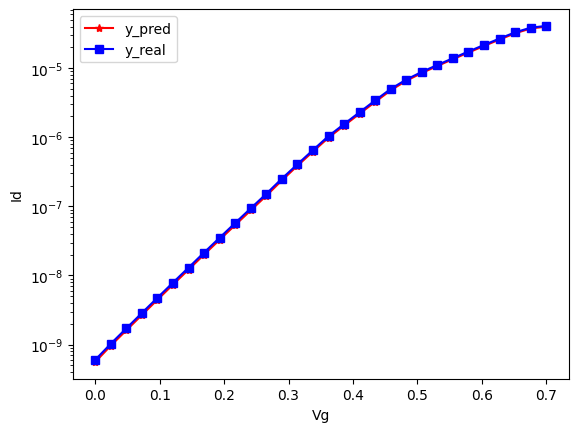

tensor([0.0232, 0.0262])


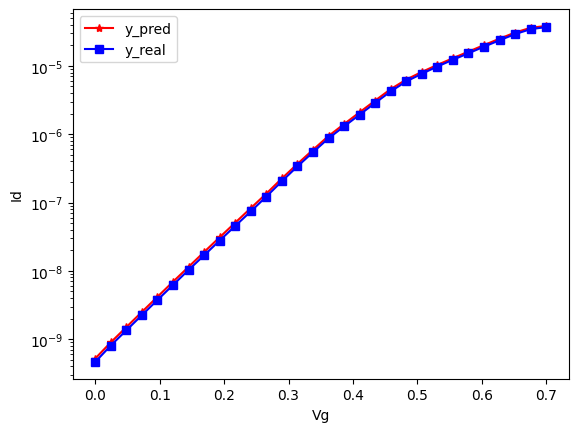

tensor([0.0160, 0.0490])


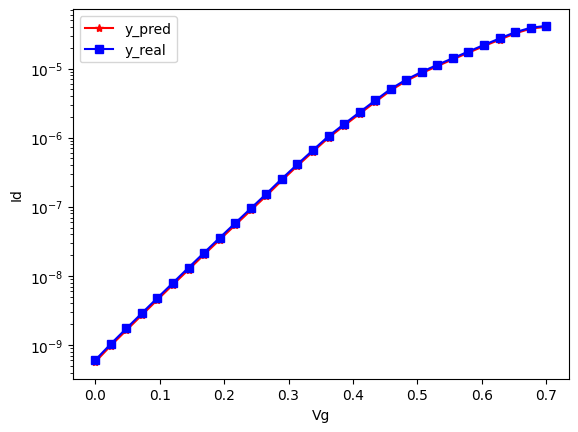

tensor([0.0196, 0.0417])


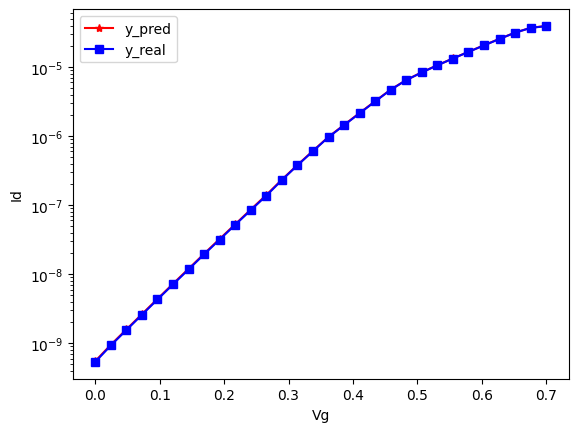

tensor([0.0210, 0.0355])


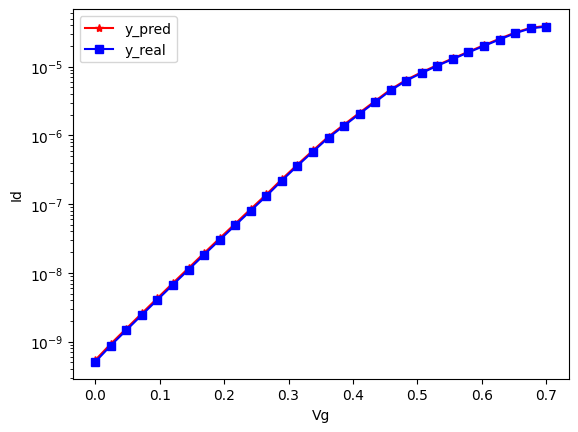

tensor([0.0219, 0.0355])


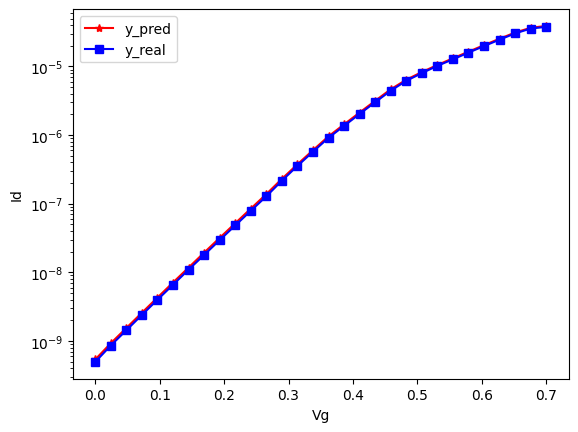

tensor([0.0120, 0.0438])


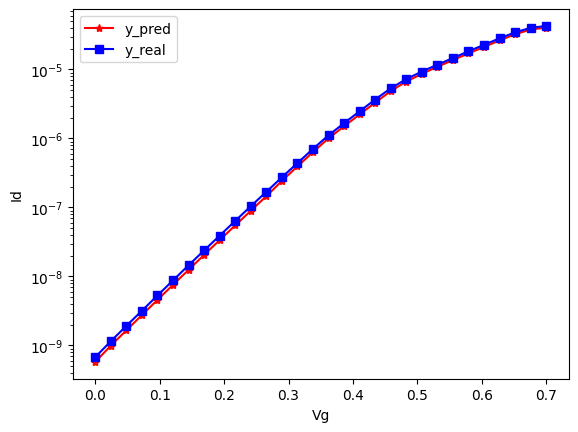

tensor([0.0205, 0.0397])


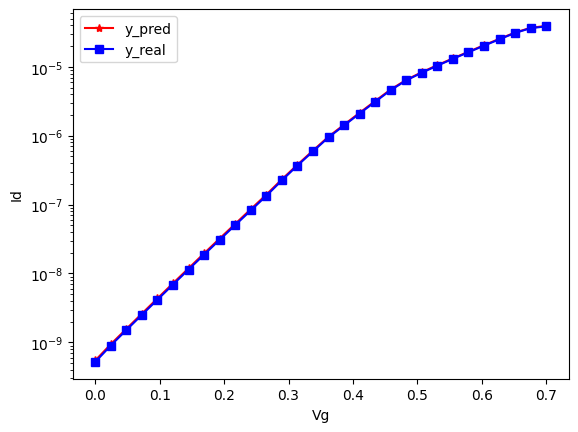

tensor([0.0183, 0.0314])


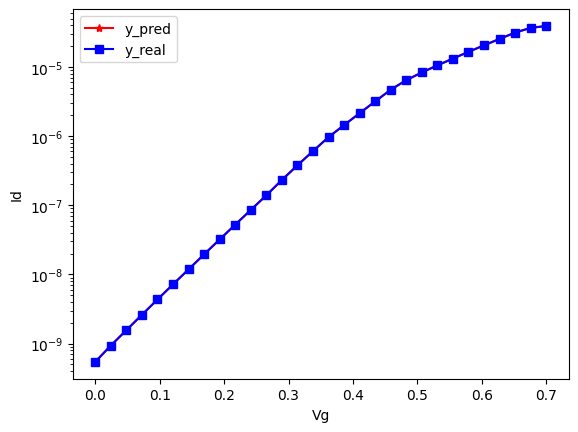

tensor([0.0147, 0.0500])


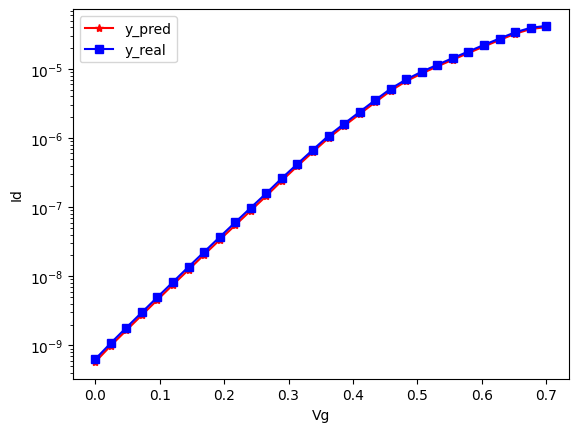

tensor([0.0129, 0.0231])


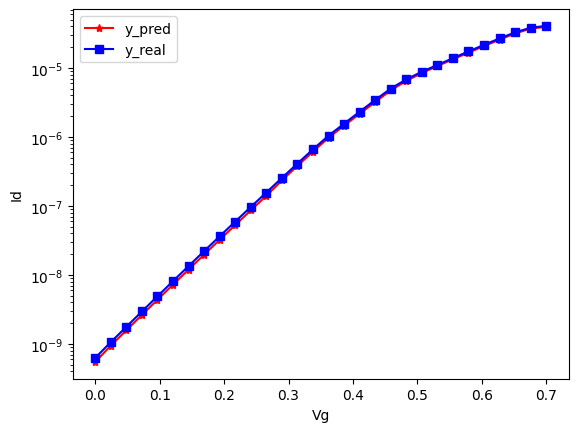

tensor([0.0151, 0.0500])


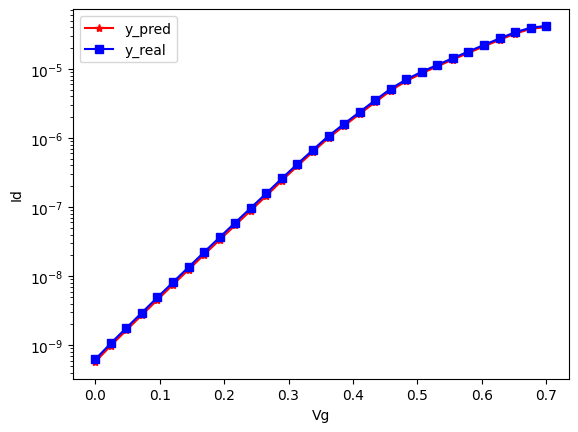

tensor([0.0174, 0.0303])


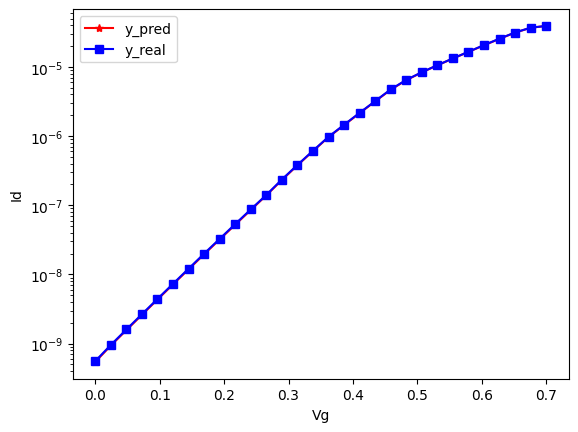

tensor([0.0228, 0.0448])


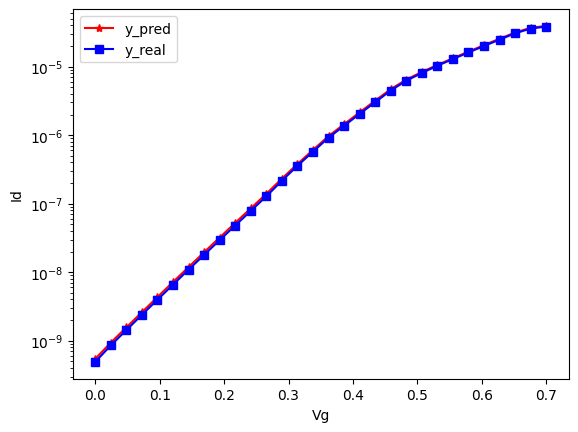

tensor([0.0214, 0.0428])


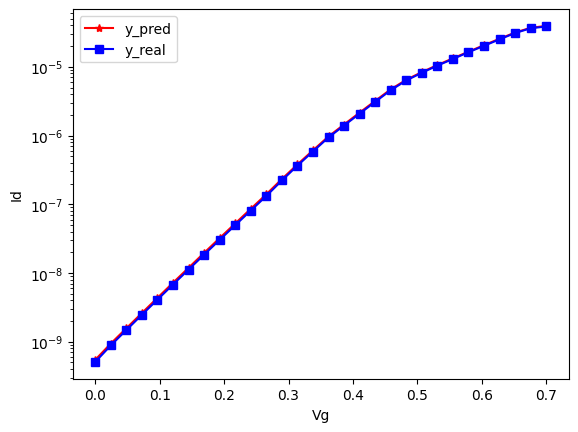

tensor([0.0210, 0.0459])


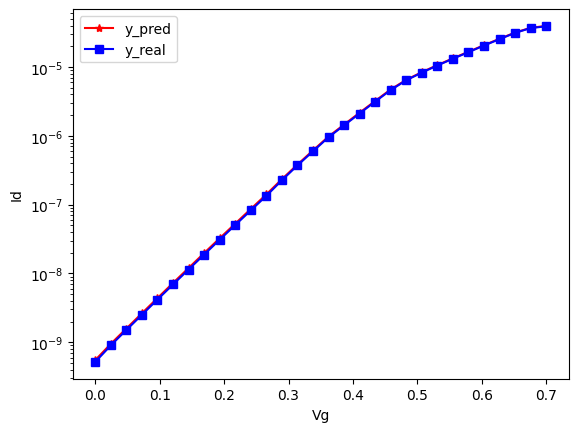

tensor([0.0151, 0.0252])


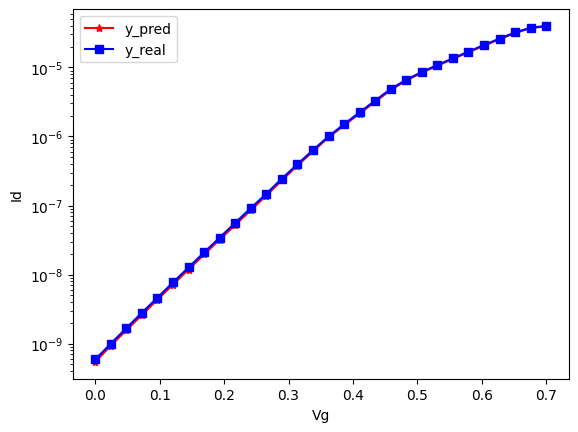

tensor([0.0196, 0.0293])


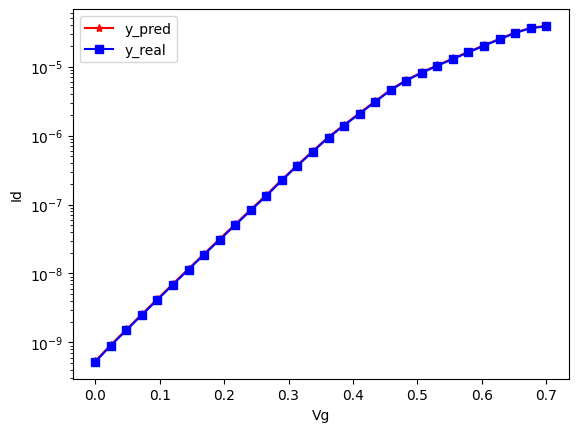

tensor([0.0192, 0.0345])


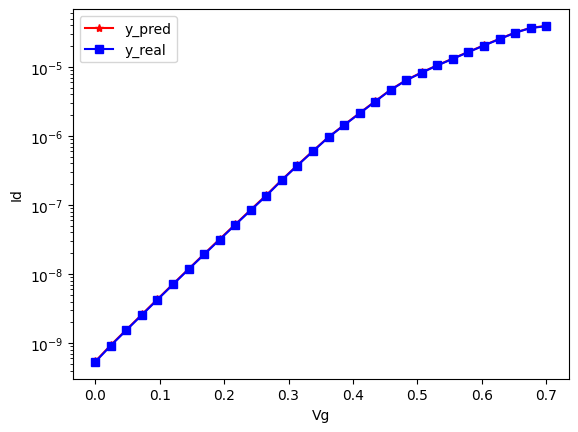

tensor([0.0241, 0.0428])


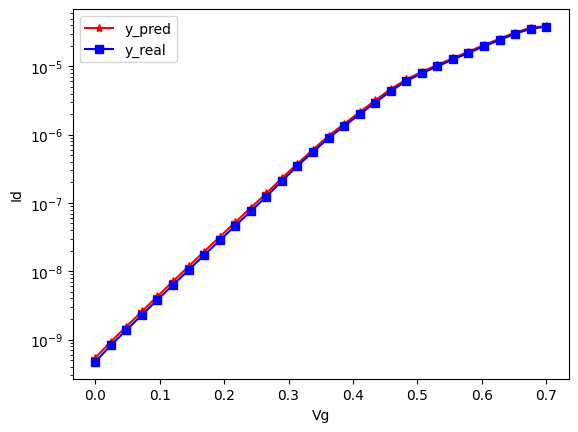

tensor([0.0187, 0.0231])


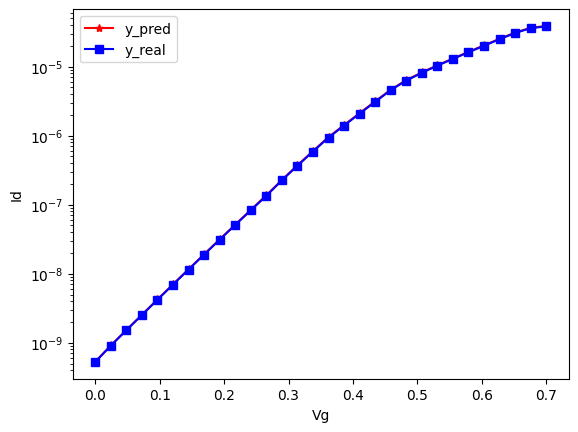

tensor([0.0169, 0.0428])


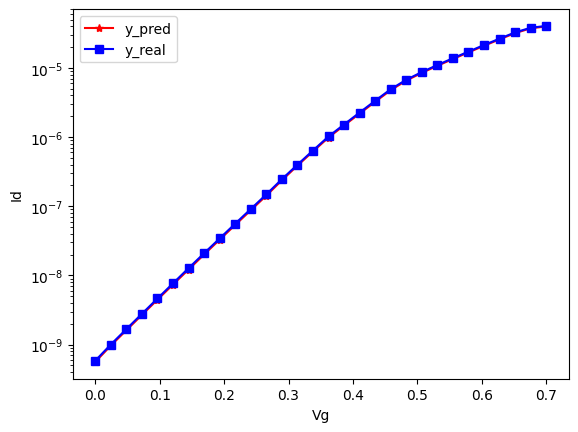

tensor([0.0201, 0.0293])


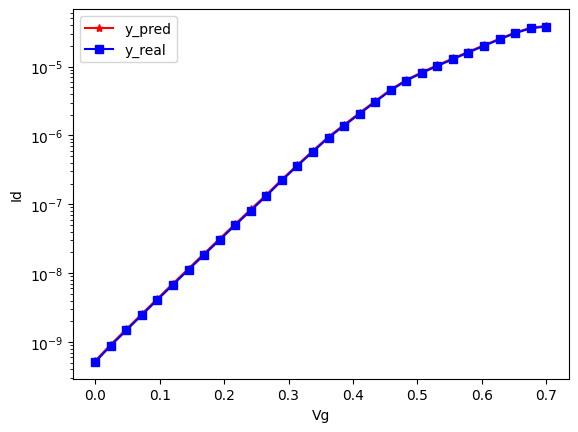

tensor([0.0160, 0.0303])


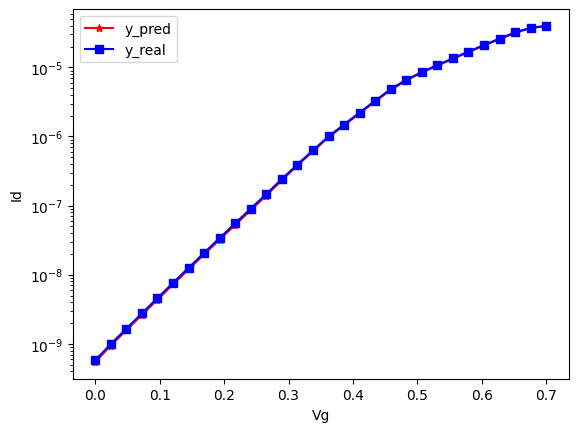

tensor([0.0156, 0.0272])


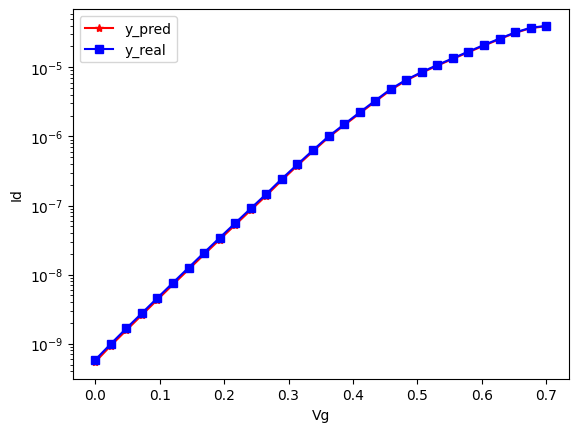

tensor([0.0151, 0.0231])


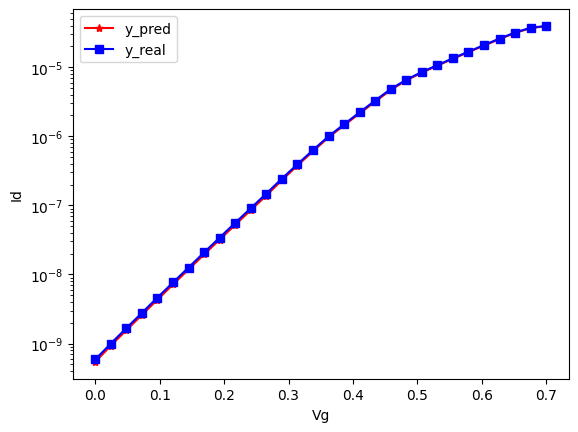

tensor([0.0138, 0.0376])


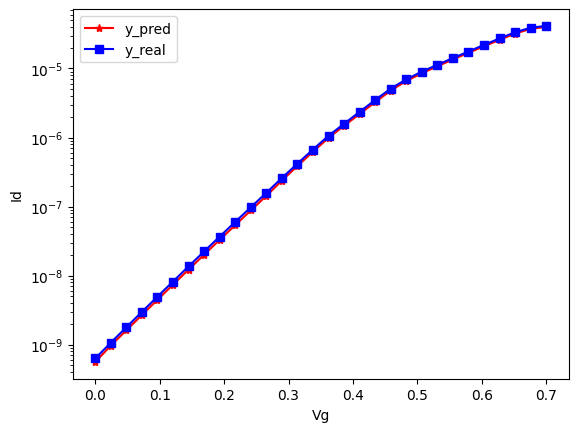

tensor([0.0178, 0.0262])


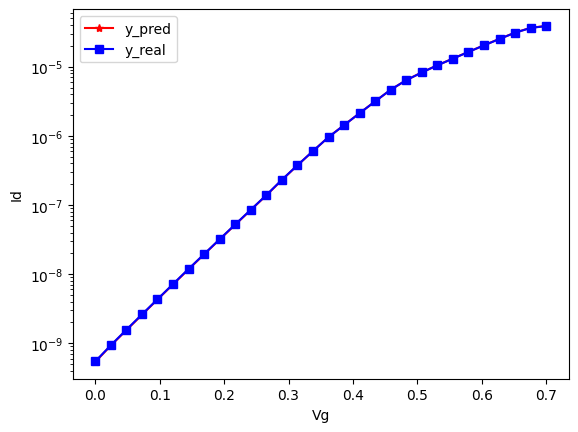

tensor([0.0165, 0.0221])


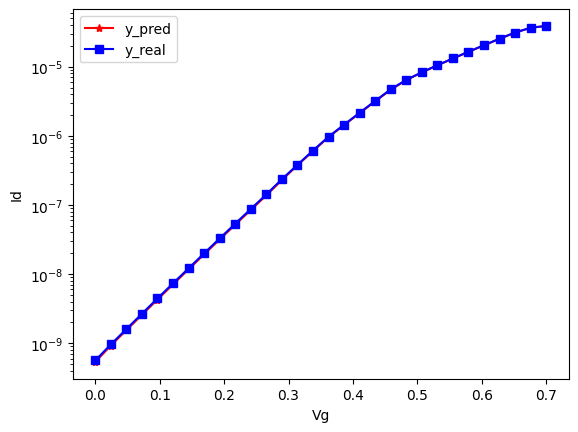

tensor([0.0201, 0.0231])


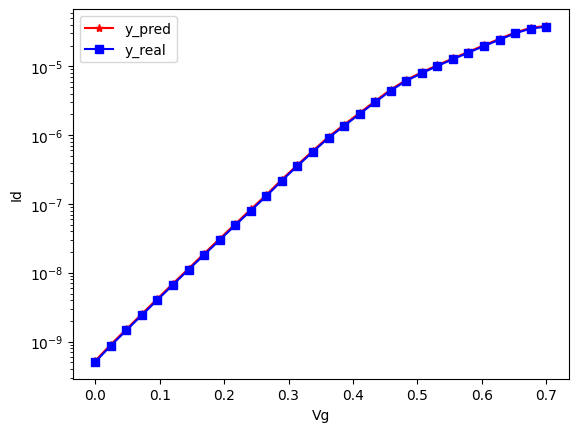

tensor([0.0124, 0.0345])


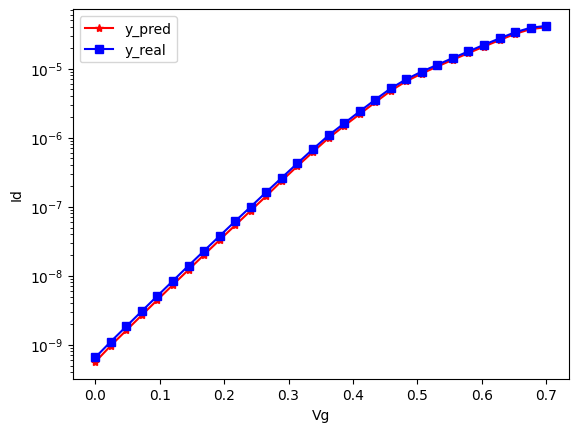

tensor([0.0178, 0.0200])


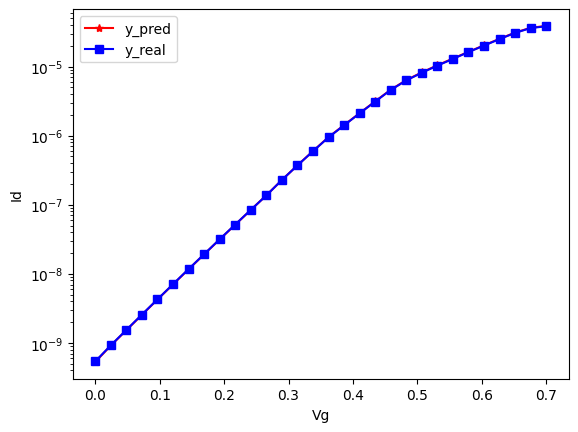

tensor([0.0228, 0.0397])


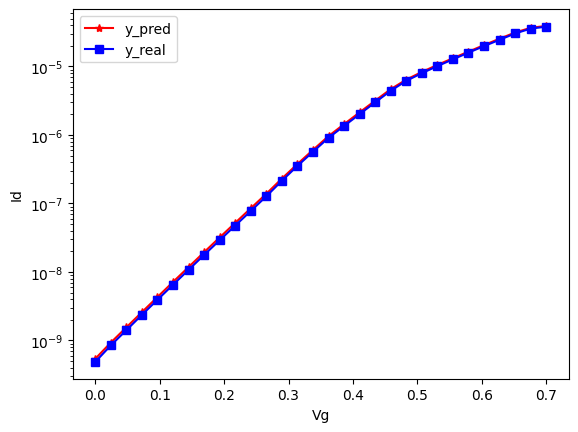

tensor([0.0183, 0.0490])


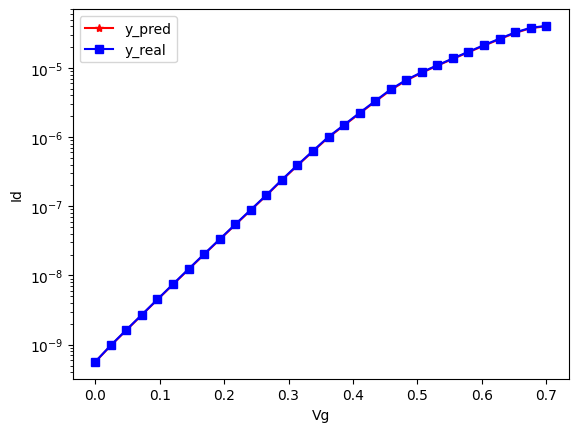

tensor([0.0147, 0.0490])


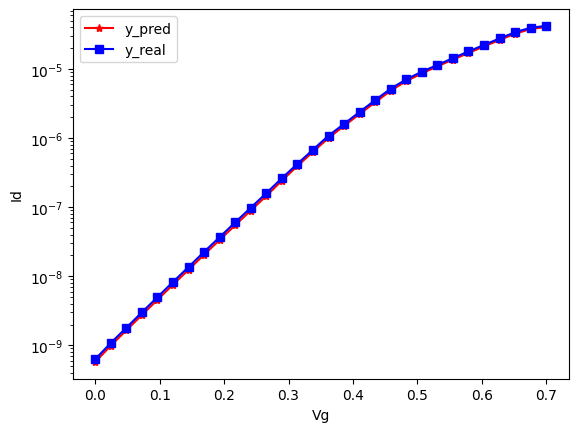

tensor([0.0147, 0.0386])


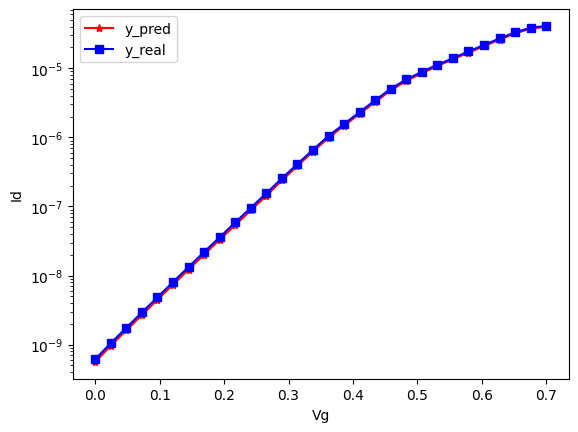

tensor([0.0219, 0.0283])


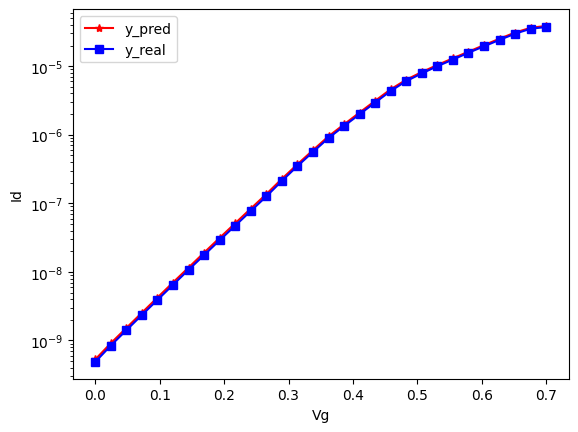

tensor([0.0196, 0.0262])


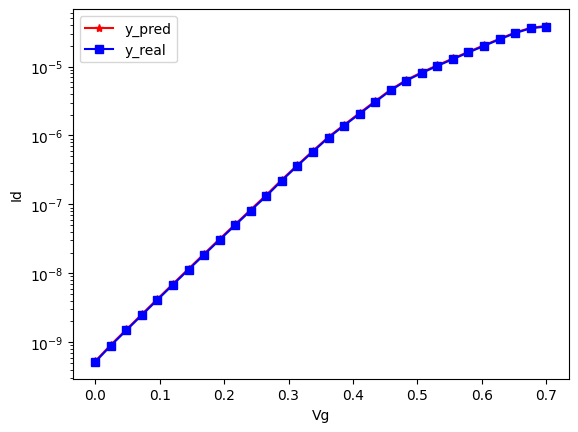

tensor([0.0165, 0.0490])


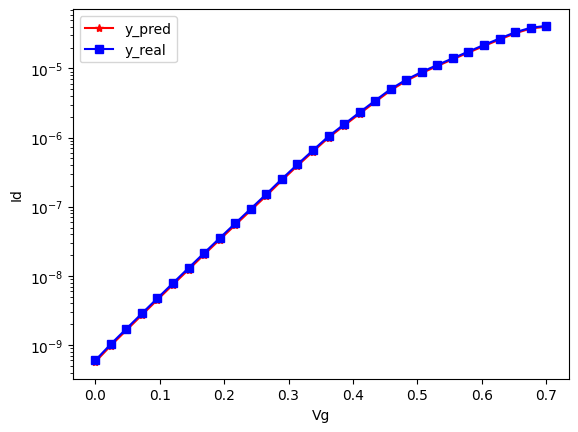

tensor([0.0183, 0.0500])


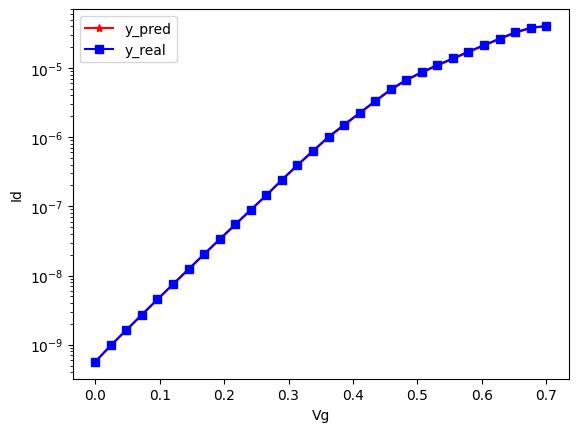

tensor([0.0210, 0.0469])


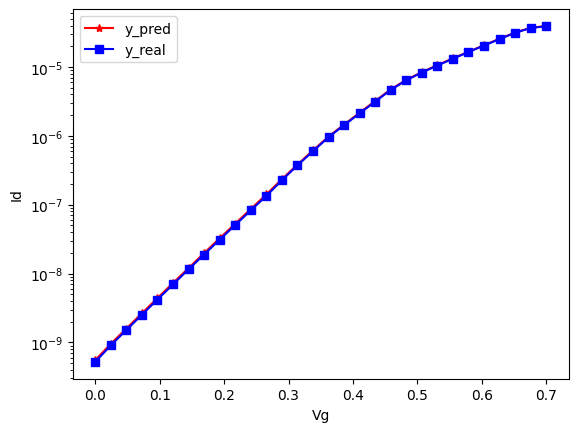

tensor([0.0205, 0.0334])


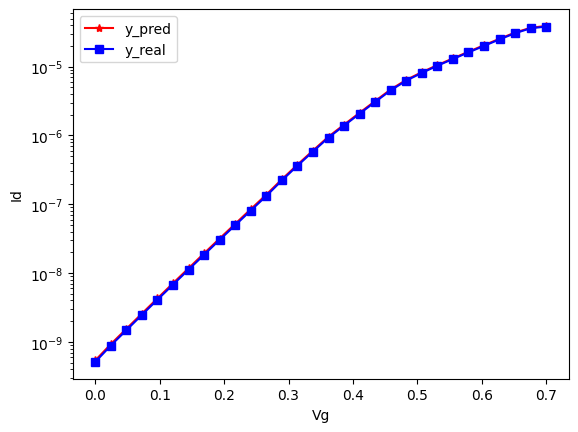

tensor([0.0241, 0.0366])


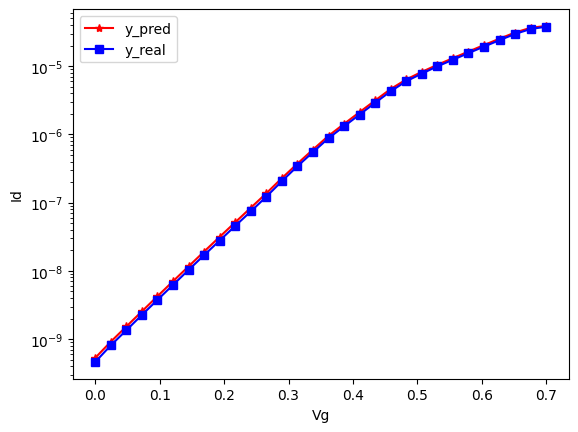

tensor([0.0165, 0.0345])


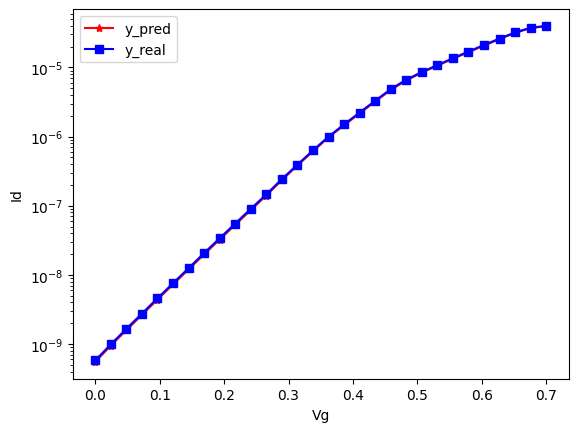

tensor([0.0138, 0.0366])


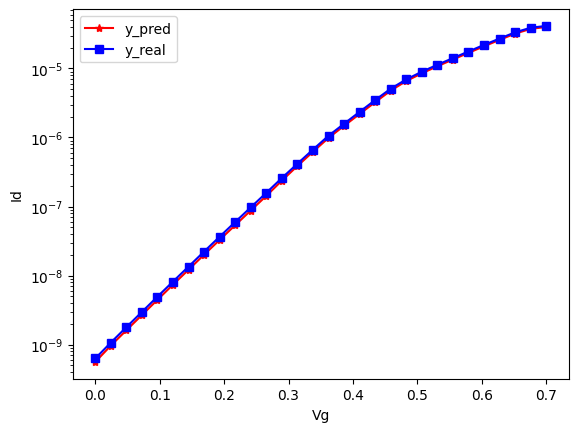

tensor([0.0246, 0.0231])


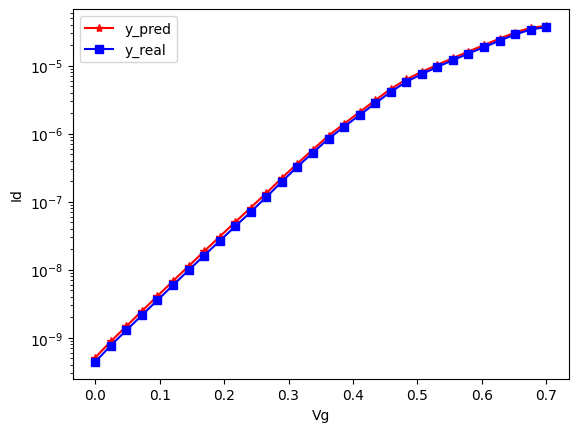

tensor([0.0174, 0.0210])


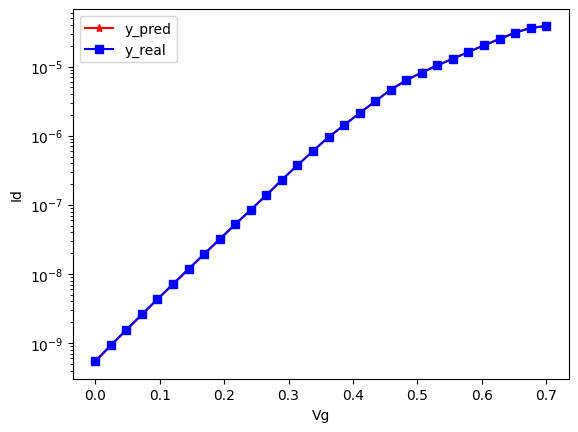

tensor([0.0192, 0.0334])


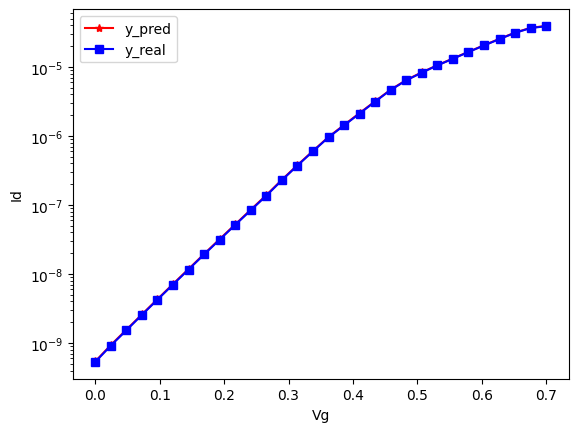

tensor([0.0129, 0.0200])


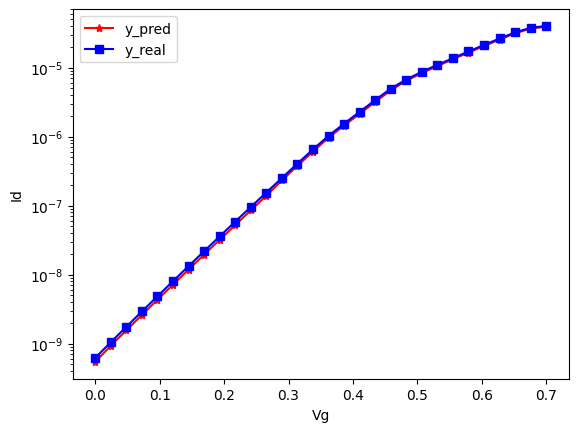

tensor([0.0219, 0.0241])


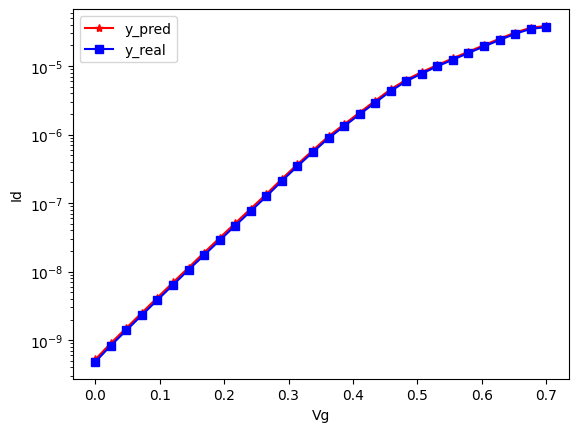

tensor([0.0196, 0.0355])


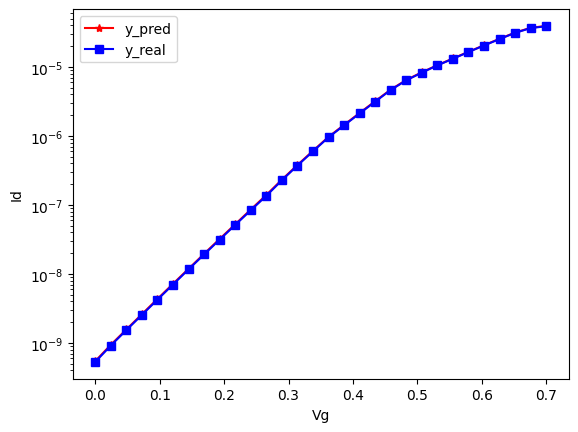

tensor([0.0142, 0.0448])


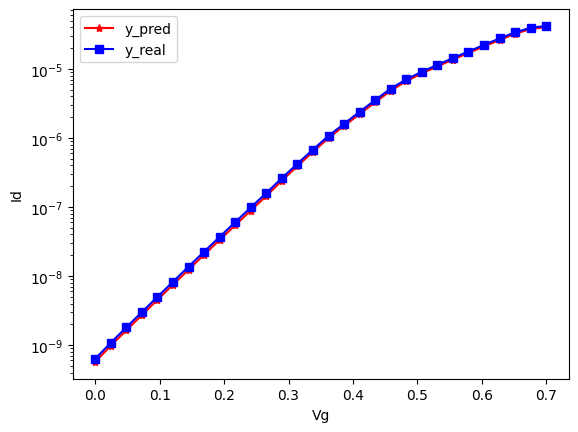

tensor([0.0196, 0.0469])


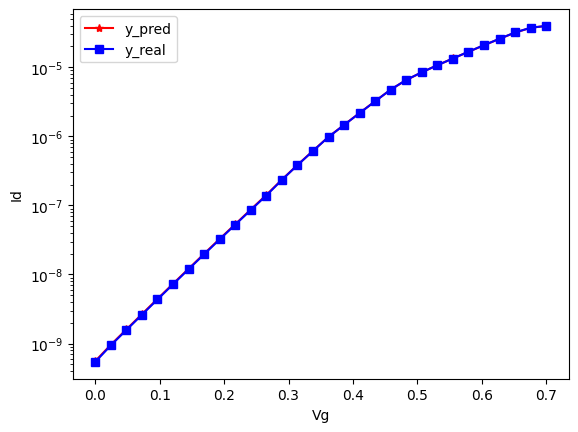

tensor([0.0129, 0.0262])


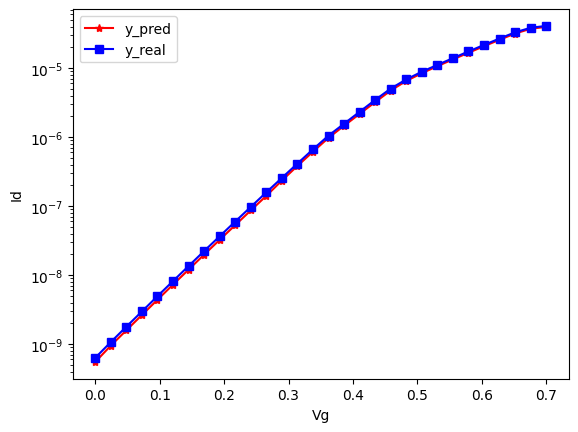

tensor([0.0241, 0.0303])


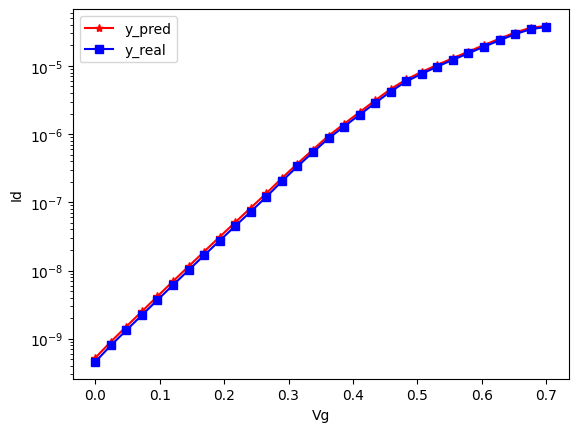

tensor([0.0232, 0.0479])


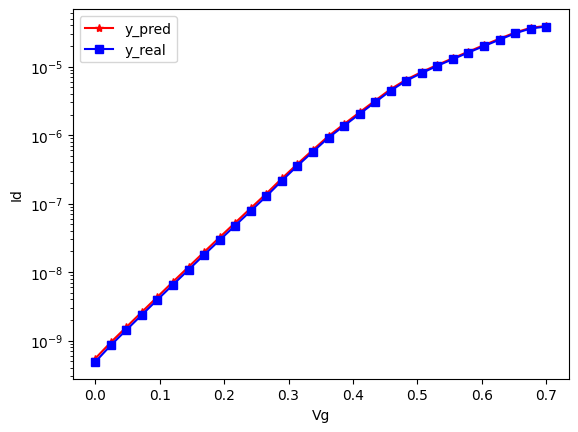

tensor([0.0174, 0.0417])


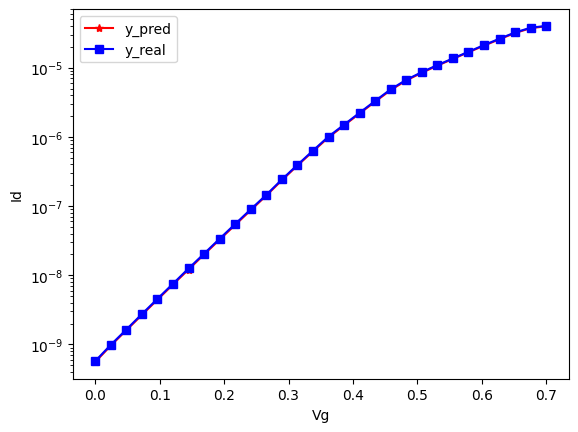

tensor([0.0192, 0.0252])


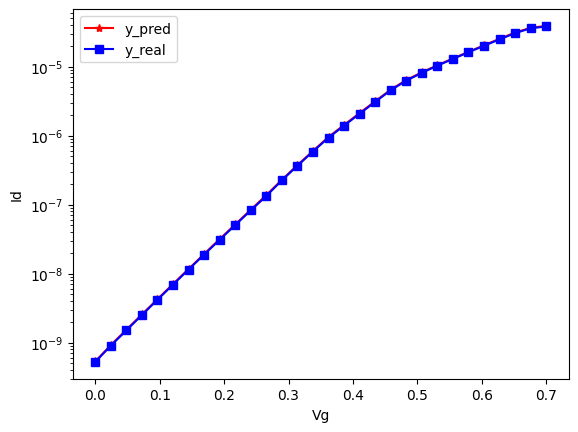

tensor([0.0151, 0.0283])


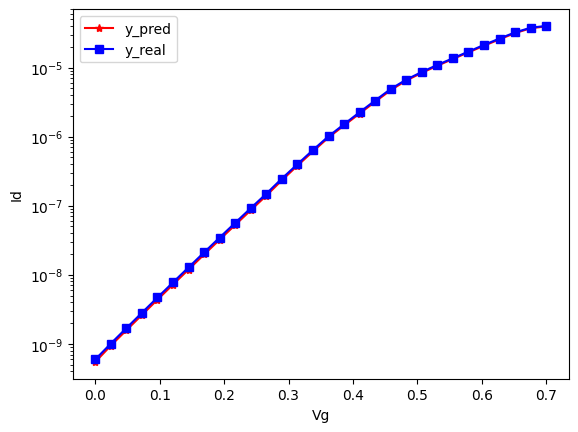

tensor([0.0205, 0.0252])


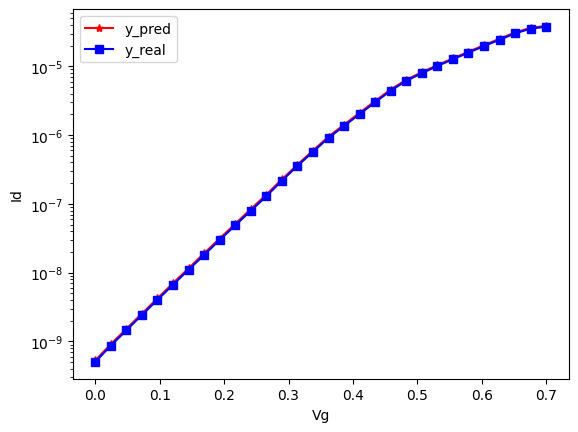

tensor([0.0169, 0.0366])


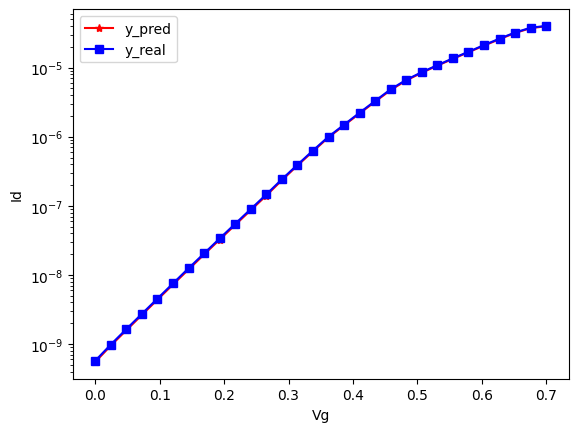

tensor([0.0201, 0.0252])


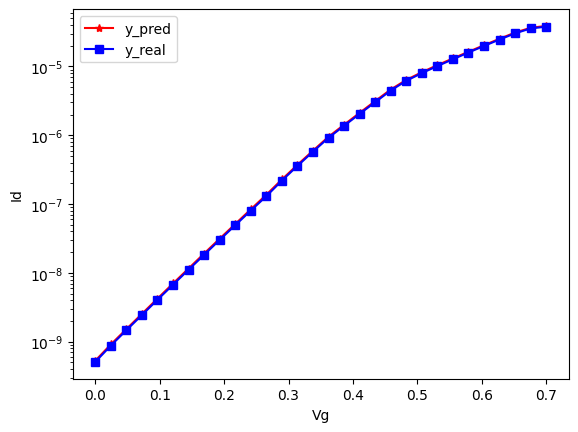

tensor([0.0237, 0.0407])


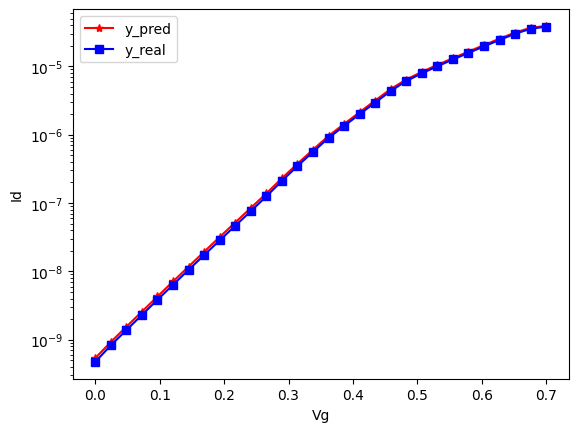

tensor([0.0237, 0.0500])


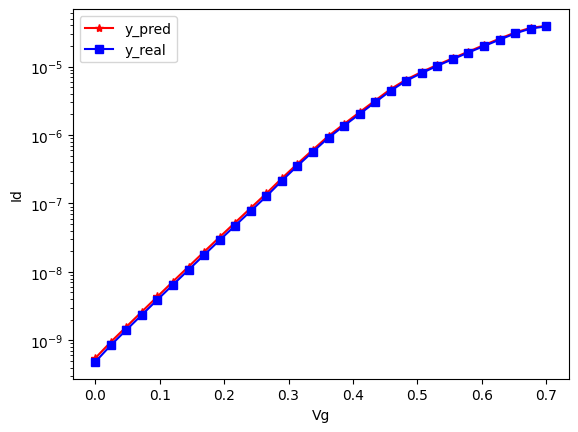

tensor([0.0232, 0.0490])


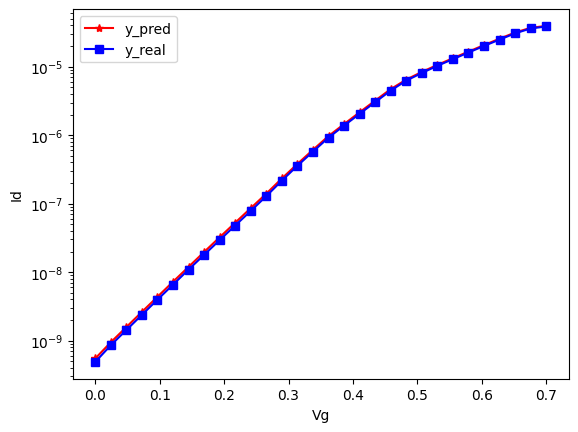

tensor([0.0178, 0.0283])


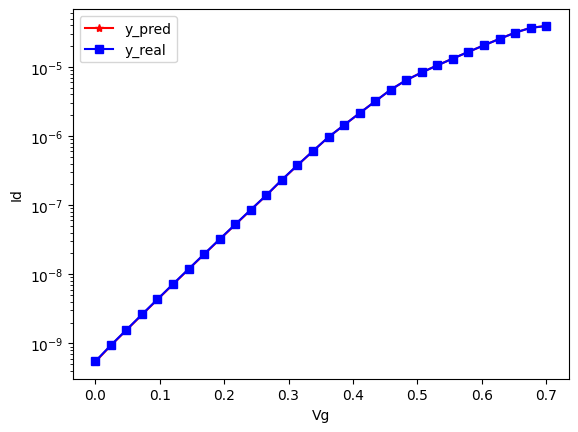

tensor([0.0129, 0.0366])


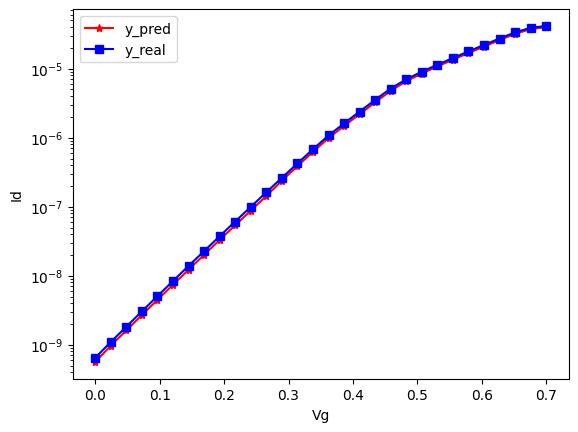

tensor([0.0147, 0.0366])


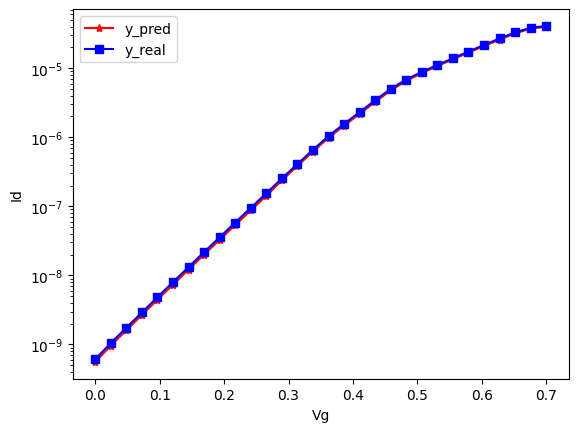

tensor([0.0214, 0.0210])


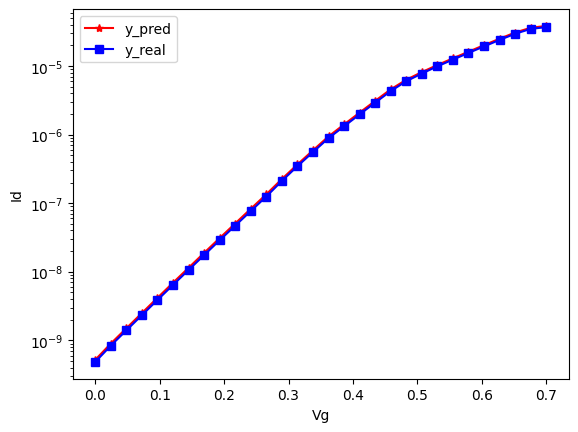

tensor([0.0232, 0.0210])


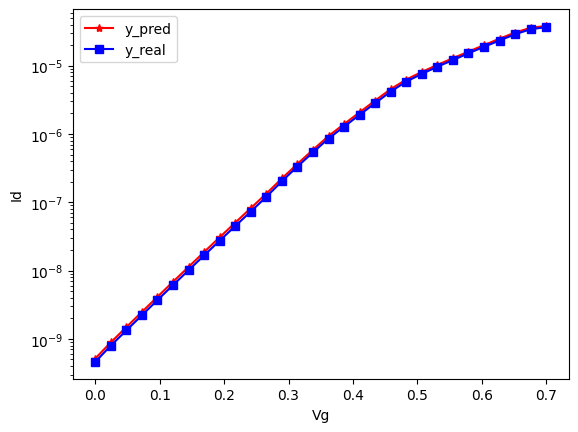

tensor([0.0205, 0.0200])


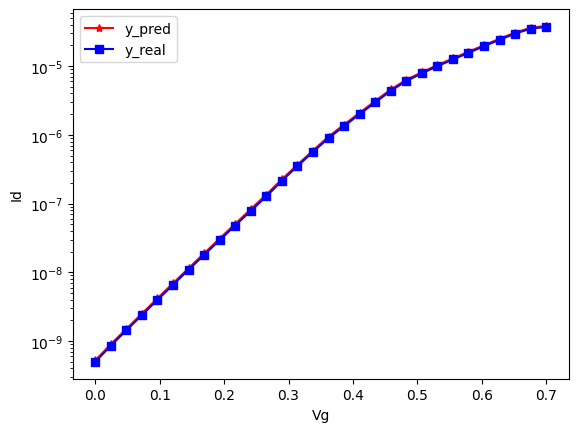

tensor([0.0178, 0.0355])


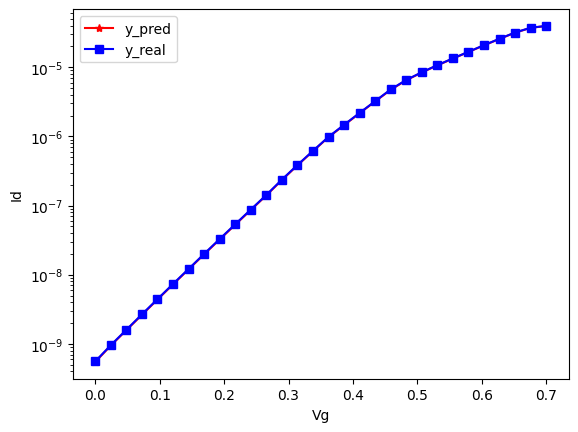

tensor([0.0196, 0.0221])


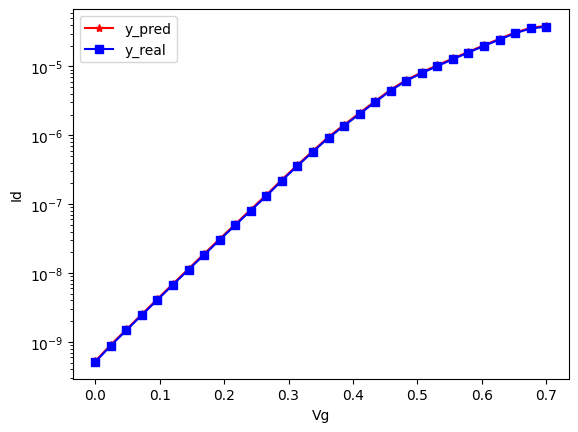

tensor([0.0169, 0.0283])


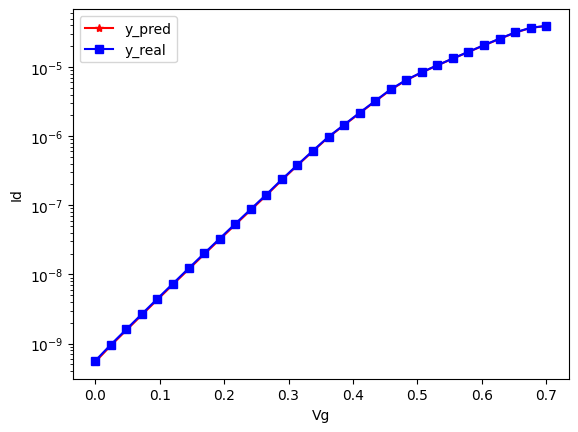

tensor([0.0250, 0.0459])


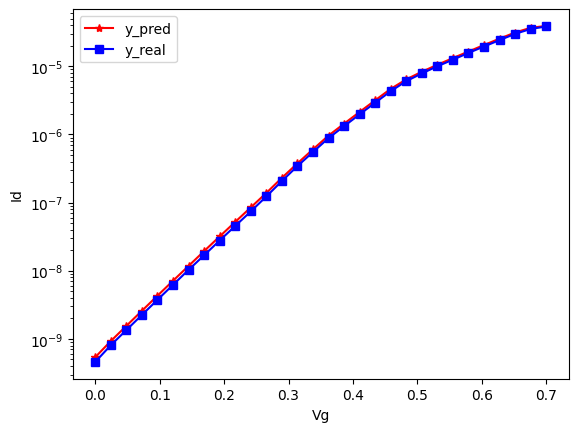

tensor([0.0151, 0.0376])


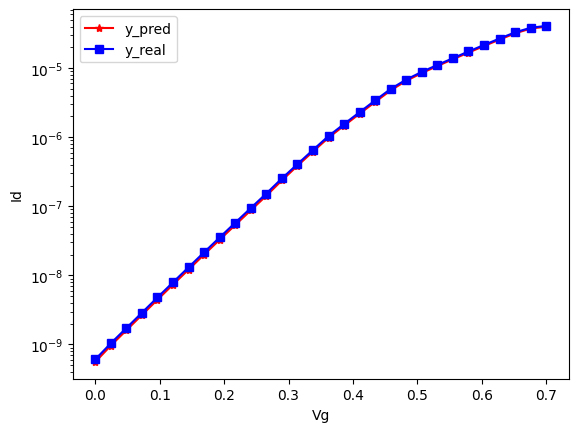

tensor([0.0219, 0.0293])


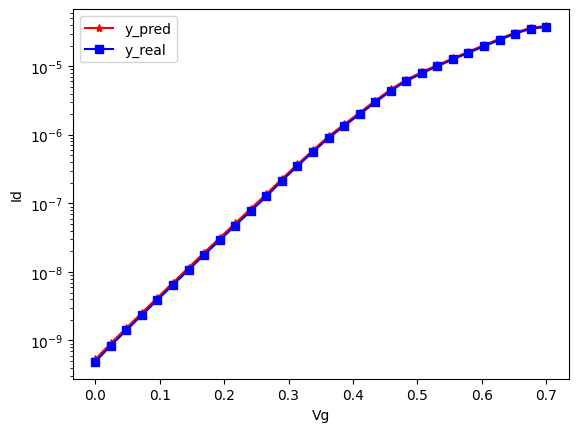

tensor([0.0147, 0.0448])


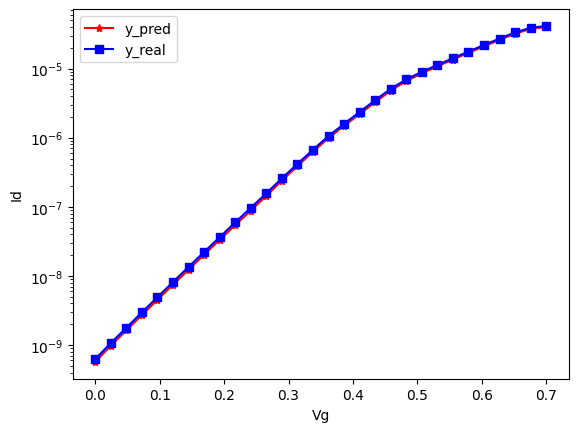

tensor([0.0228, 0.0459])


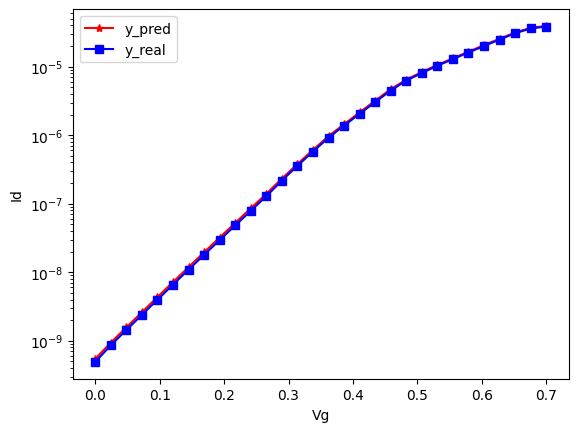

tensor([0.0147, 0.0324])


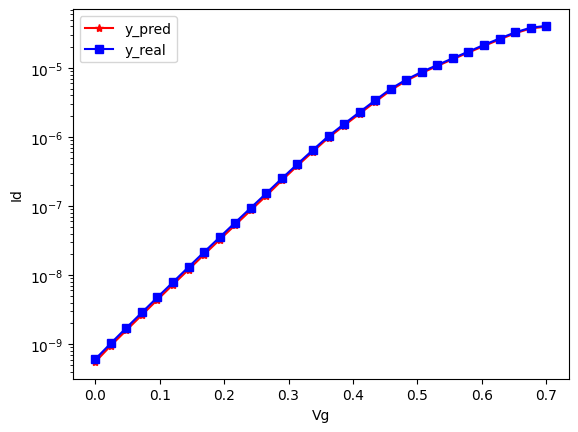

tensor([0.0250, 0.0241])


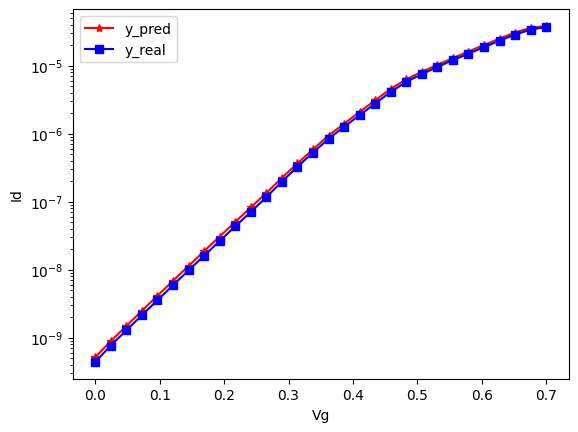

tensor([0.0237, 0.0345])


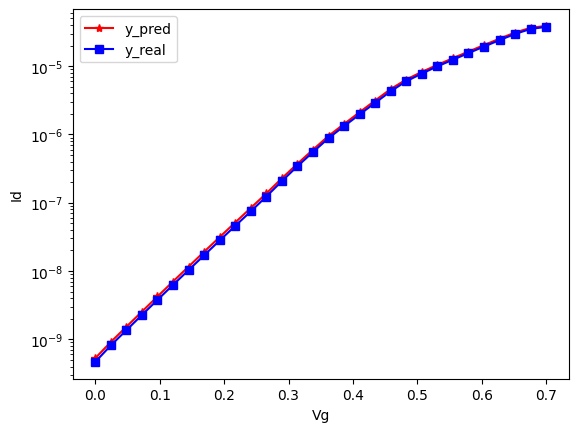

tensor([0.0232, 0.0448])


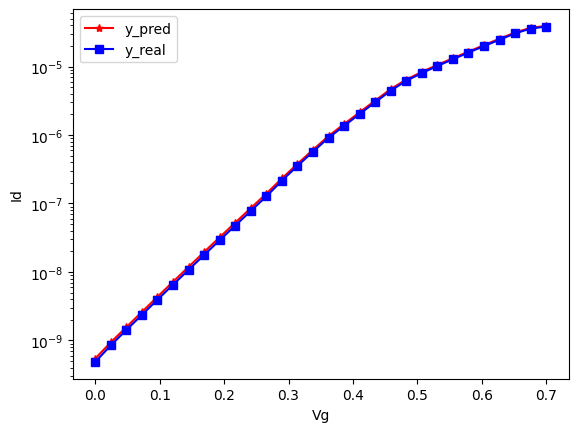

tensor([0.0192, 0.0210])


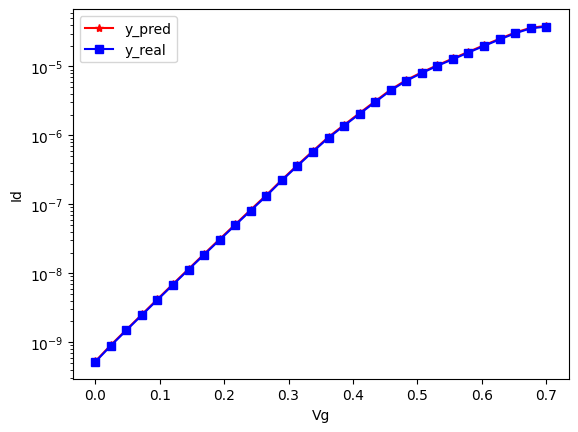

tensor([0.0241, 0.0448])


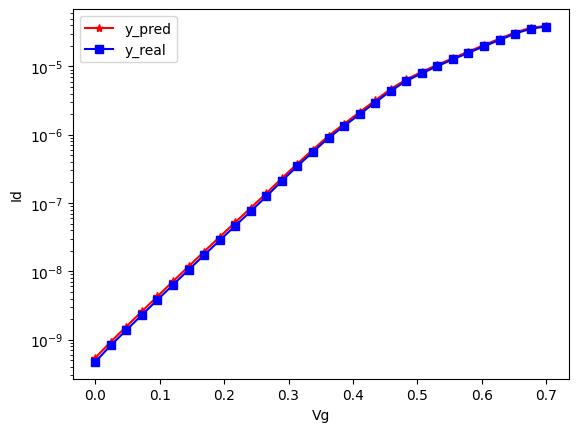

tensor([0.0187, 0.0355])


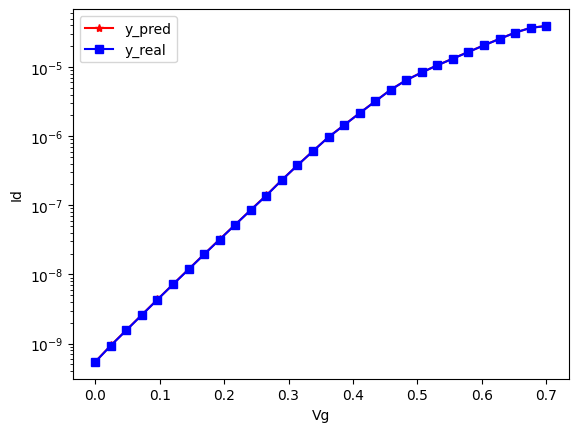

tensor([0.0237, 0.0479])


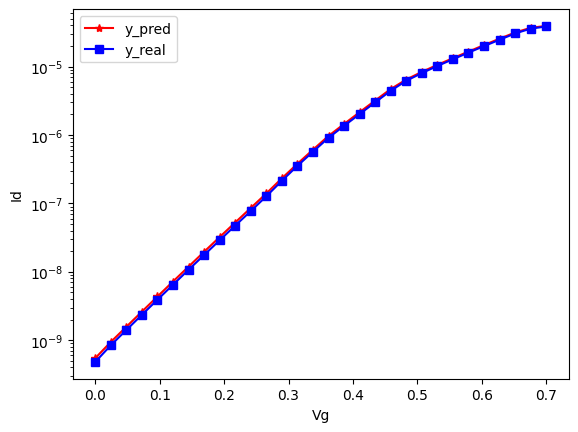

tensor([0.0250, 0.0355])


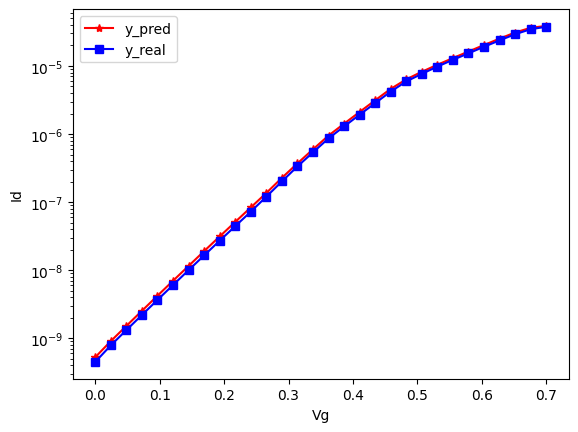

tensor([0.0133, 0.0262])


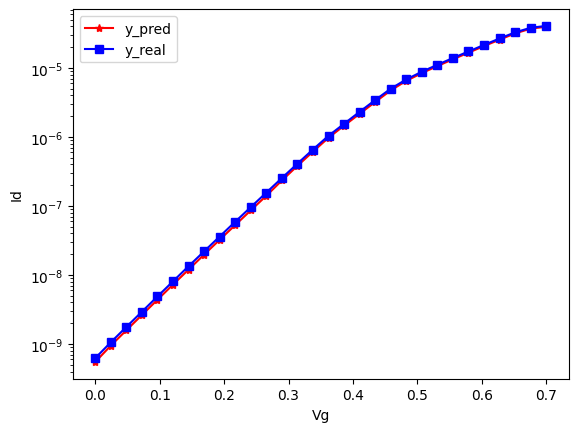

tensor([0.0250, 0.0417])


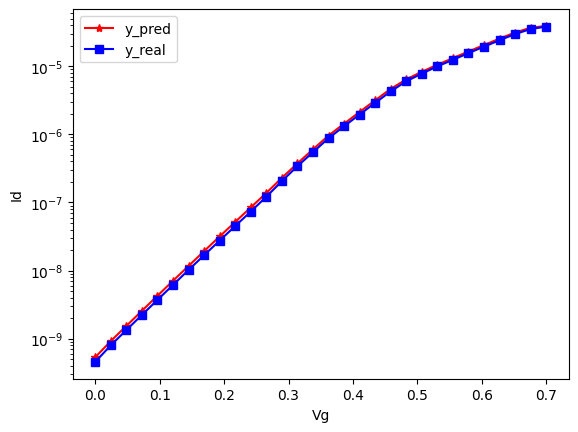

tensor([0.0165, 0.0469])


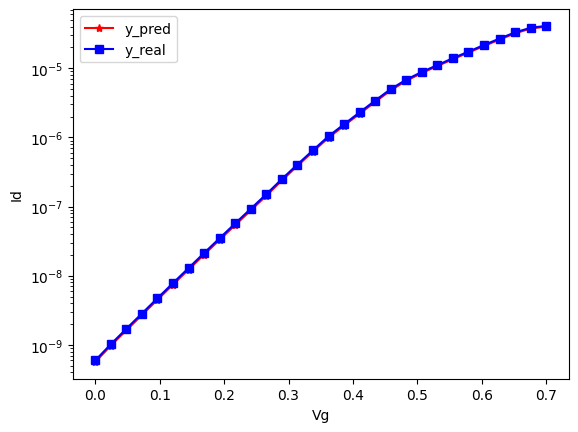

tensor([0.0160, 0.0448])


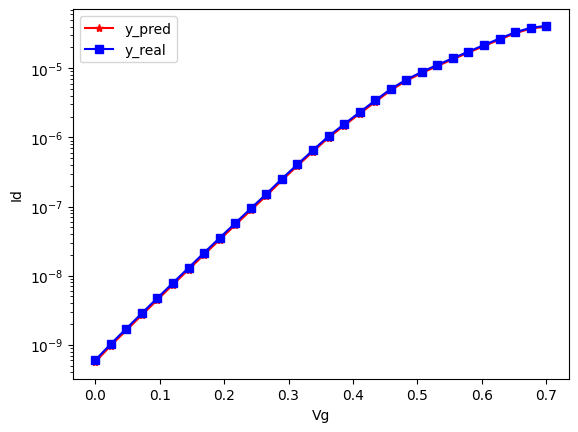

tensor([0.0151, 0.0200])


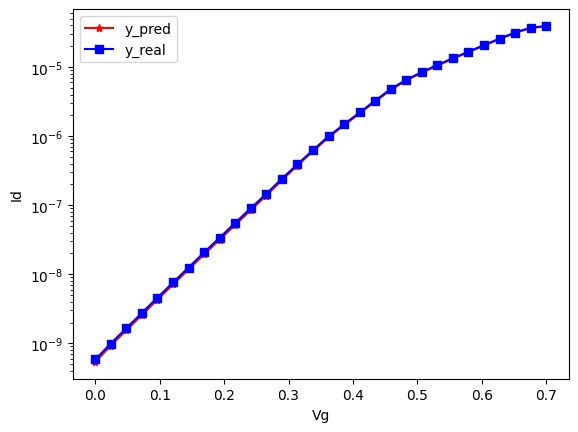

tensor([0.0183, 0.0407])


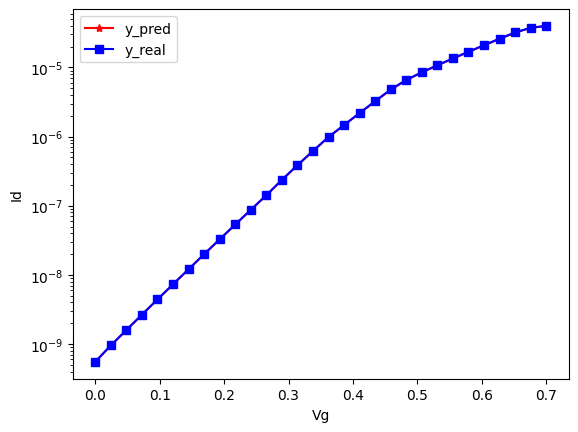

tensor([0.0237, 0.0231])


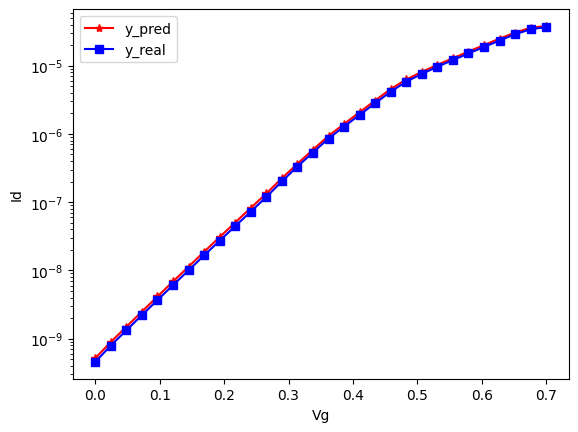

tensor([0.0129, 0.0386])


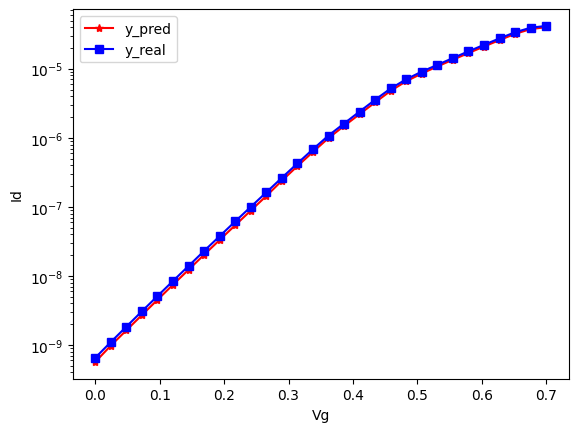

tensor([0.0156, 0.0459])


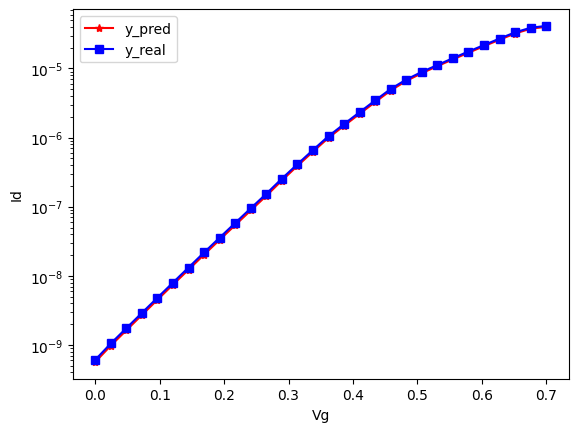

tensor([0.0241, 0.0397])


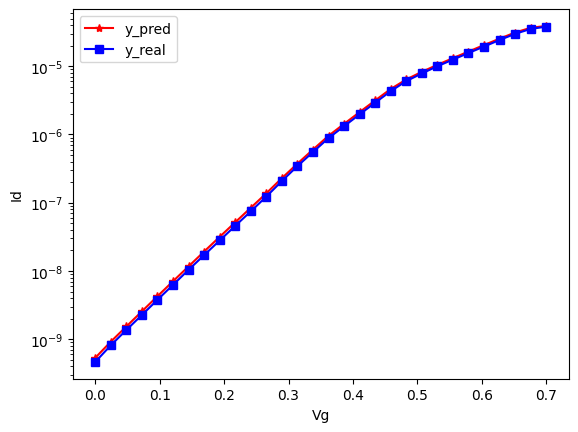

tensor([0.0183, 0.0283])


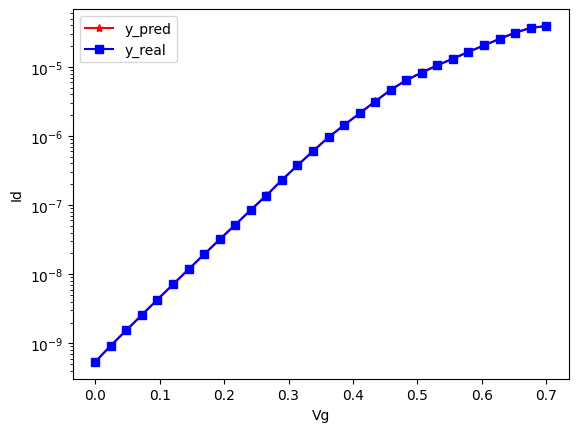

tensor([0.0138, 0.0417])


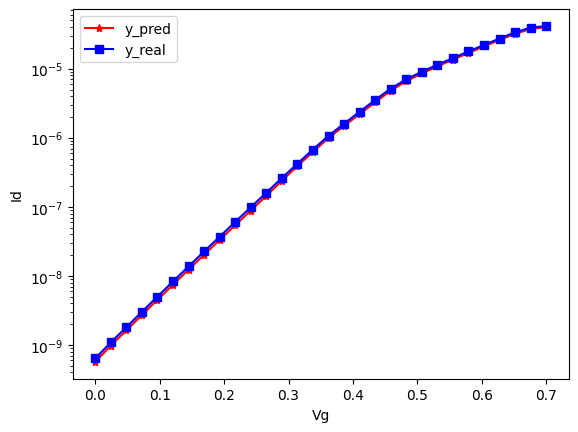

tensor([0.0205, 0.0324])


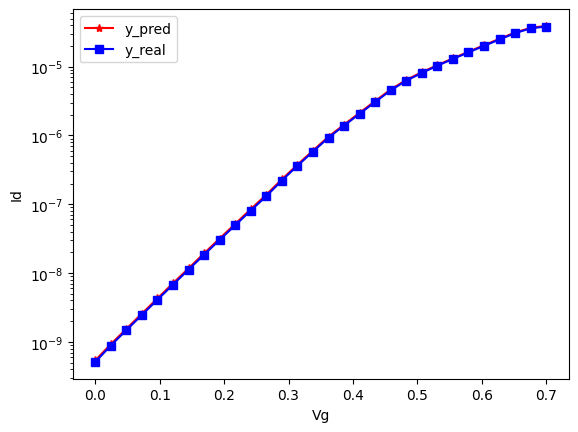

tensor([0.0228, 0.0438])


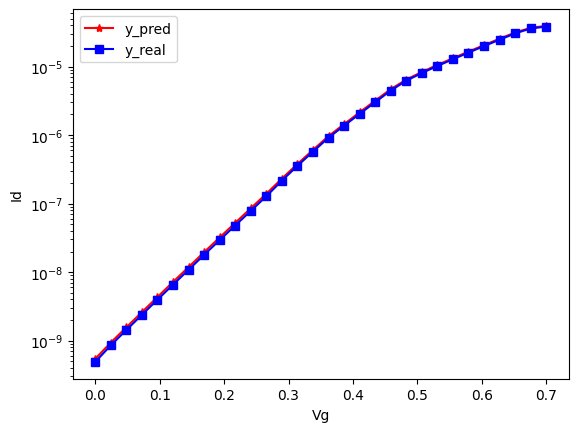

tensor([0.0174, 0.0231])


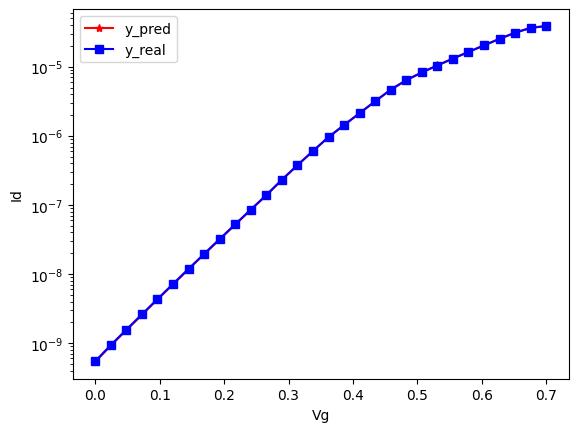

tensor([0.0129, 0.0252])


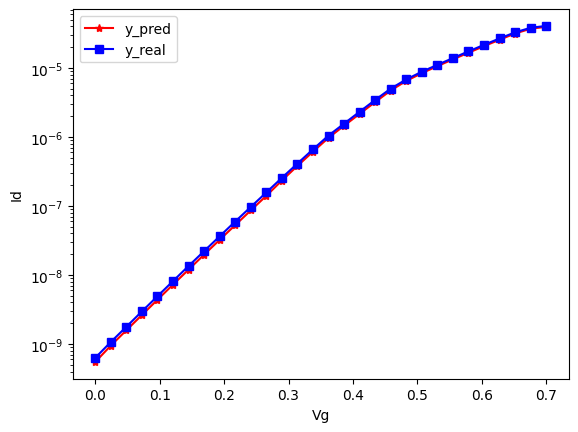

tensor([0.0237, 0.0293])


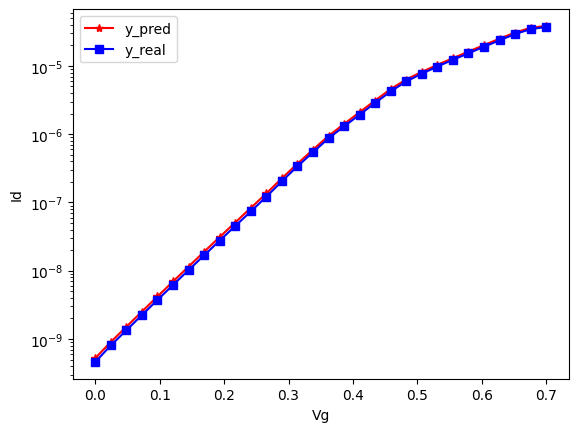

tensor([0.0160, 0.0417])


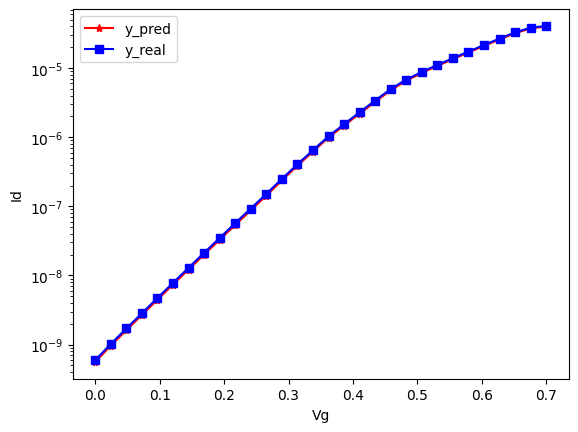

tensor([0.0210, 0.0231])


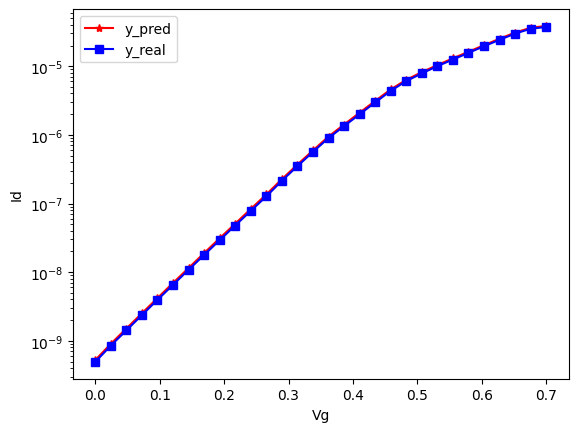

tensor([0.0246, 0.0376])


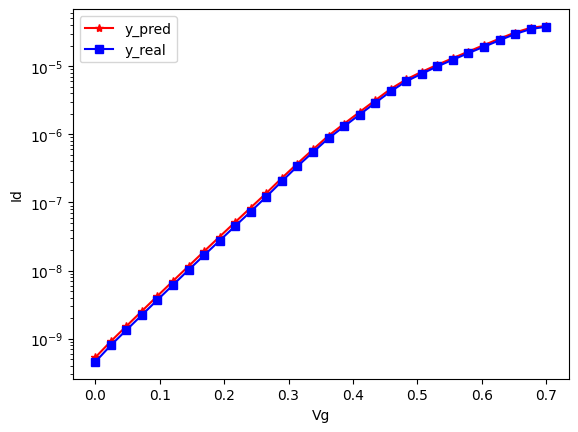

tensor([0.0192, 0.0262])


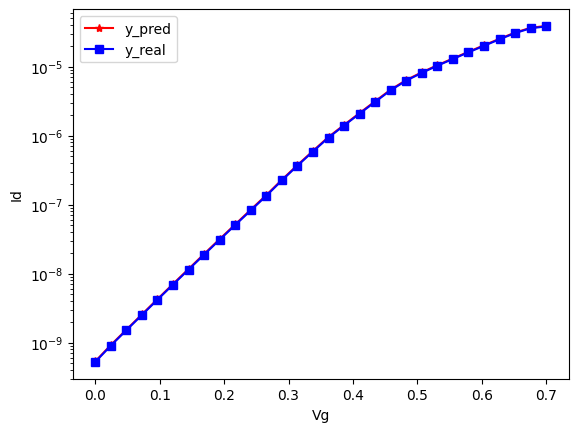

tensor([0.0151, 0.0459])


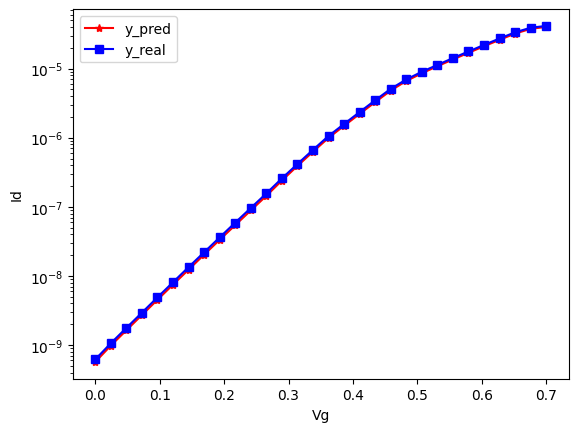

tensor([0.0156, 0.0303])


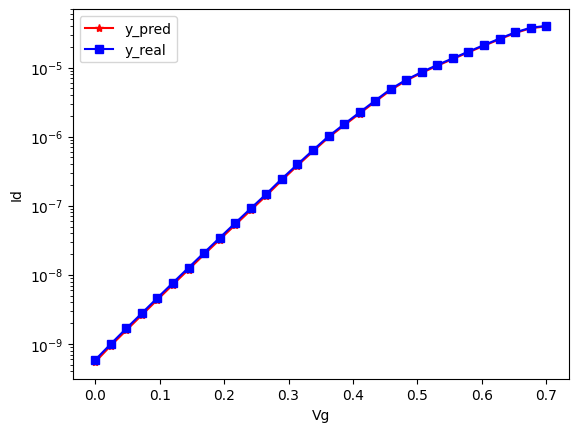

tensor([0.0124, 0.0397])


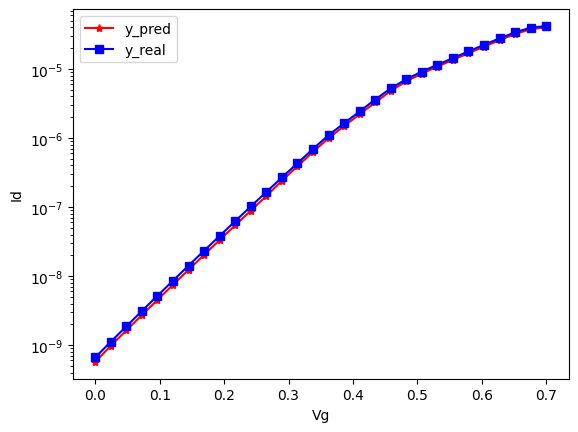

tensor([0.0214, 0.0479])


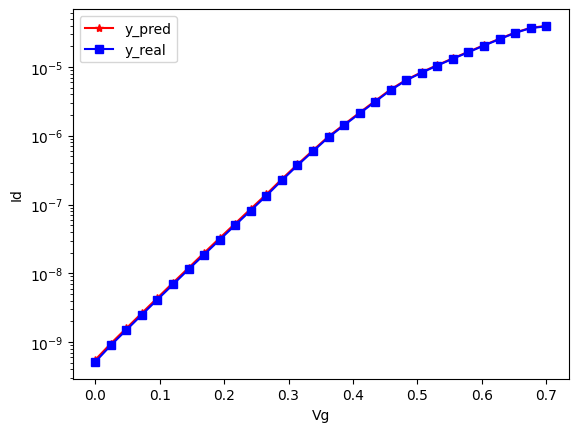

tensor([0.0165, 0.0293])


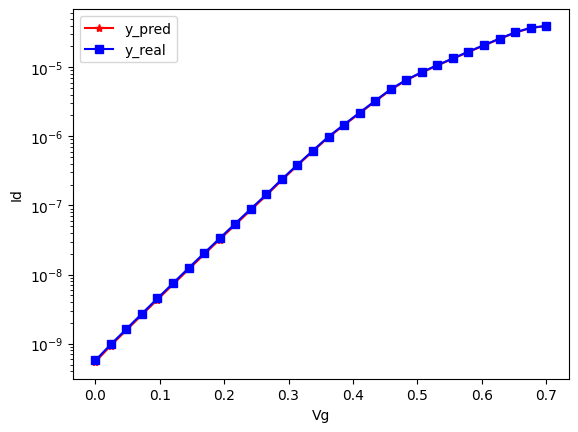

tensor([0.0223, 0.0397])


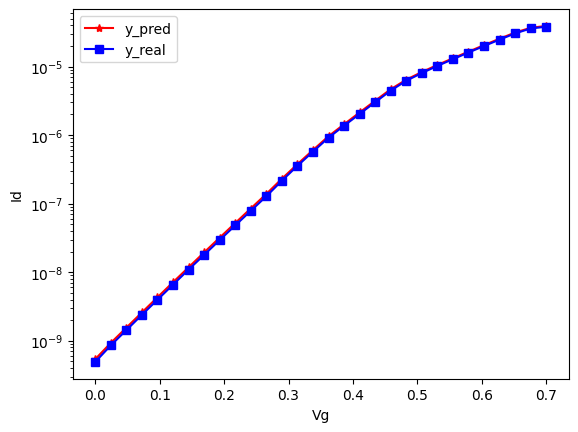

tensor([0.0160, 0.0252])


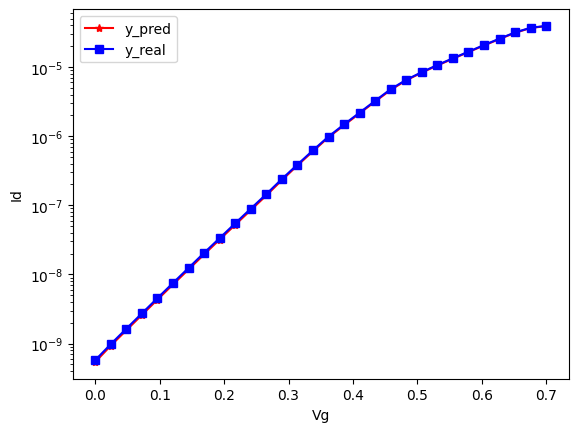

tensor([0.0250, 0.0448])


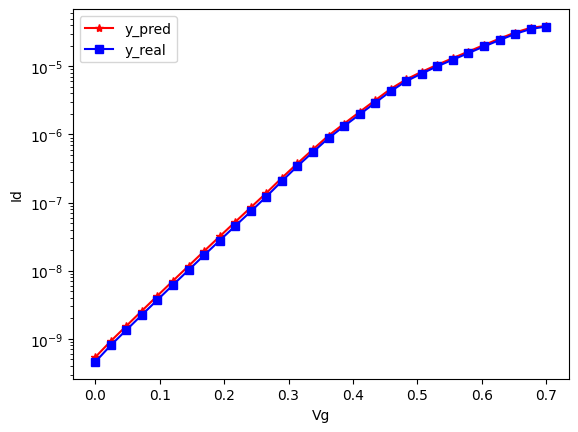

tensor([0.0142, 0.0355])


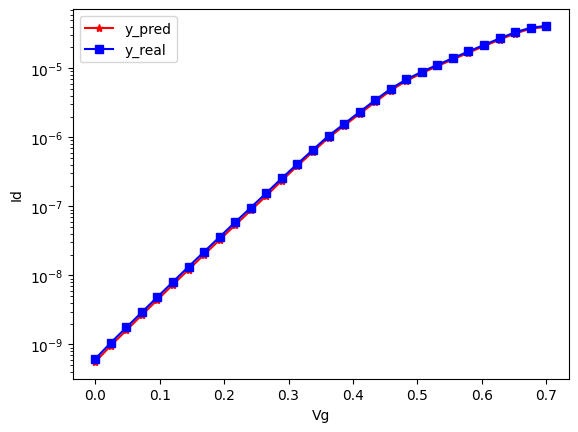

tensor([0.0196, 0.0231])


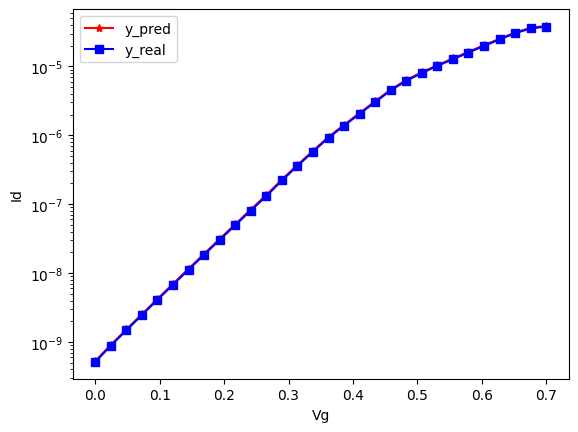

tensor([0.0124, 0.0231])


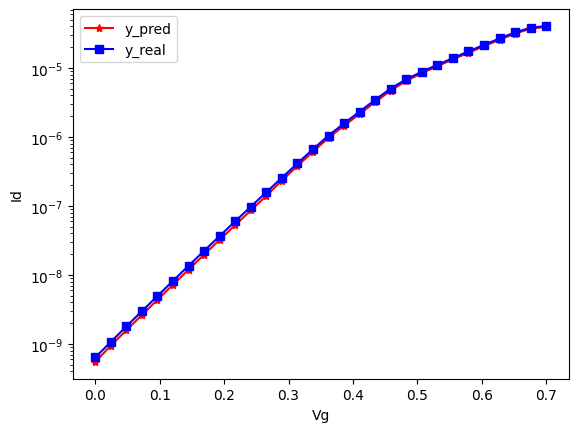

tensor([0.0124, 0.0210])


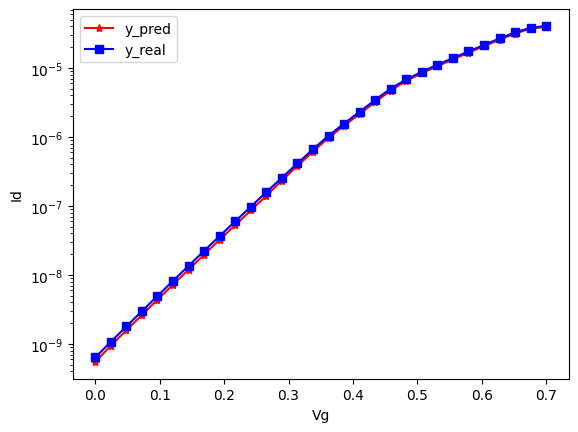

tensor([0.0219, 0.0334])


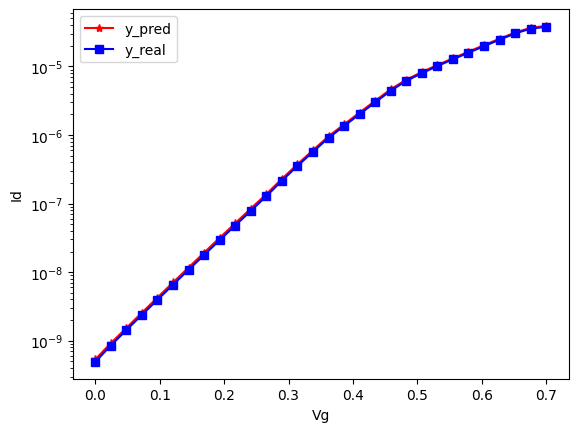

tensor([0.0178, 0.0345])


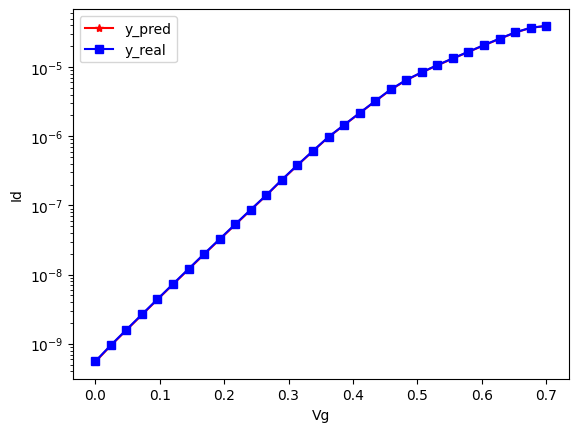

tensor([0.0196, 0.0283])


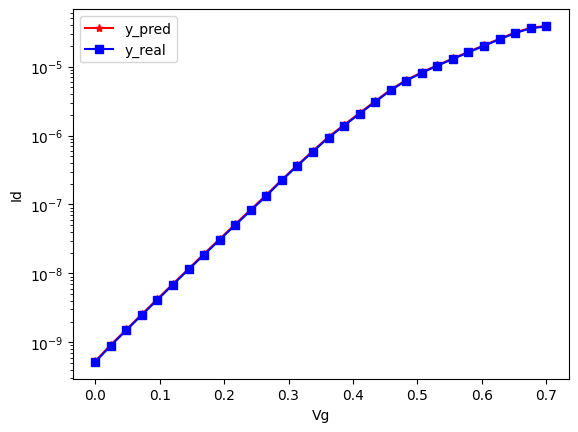

tensor([0.0183, 0.0303])


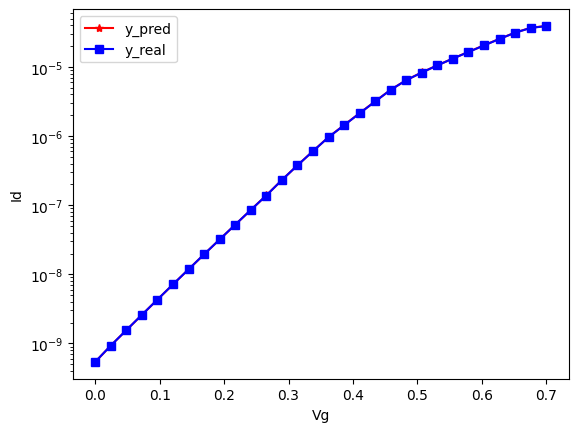

tensor([0.0133, 0.0397])


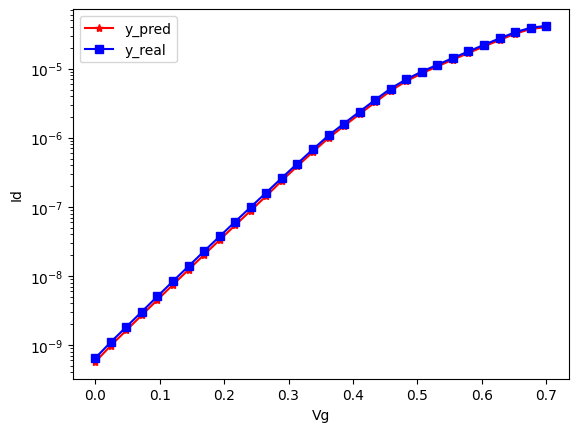

tensor([0.0129, 0.0376])


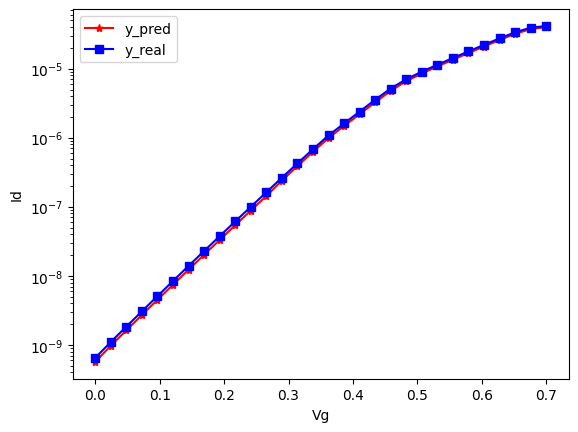

tensor([0.0178, 0.0428])


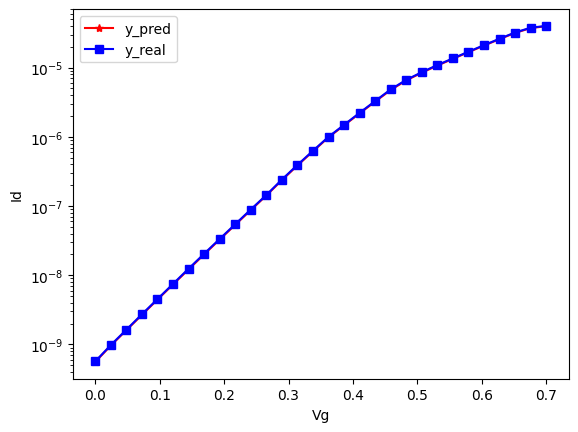

tensor([0.0165, 0.0324])


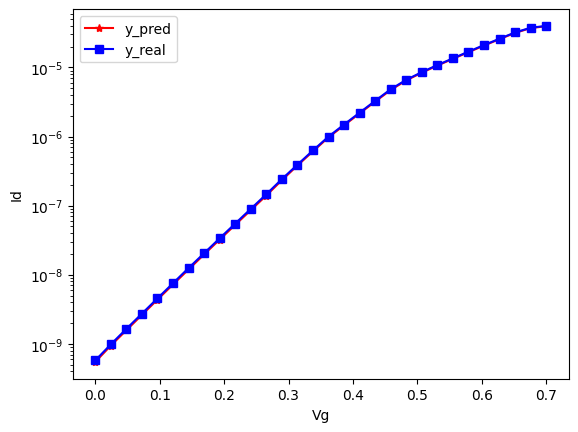

tensor([0.0129, 0.0428])


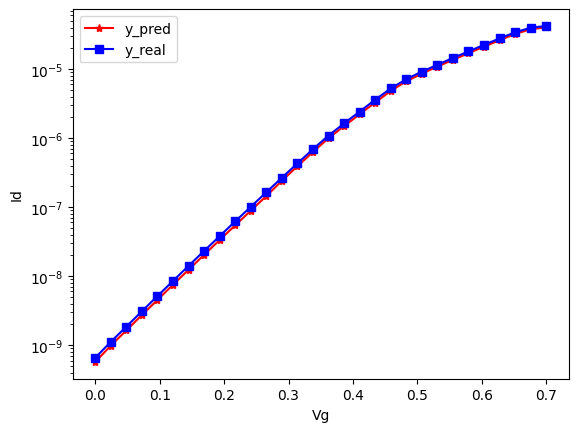

tensor([0.0165, 0.0417])


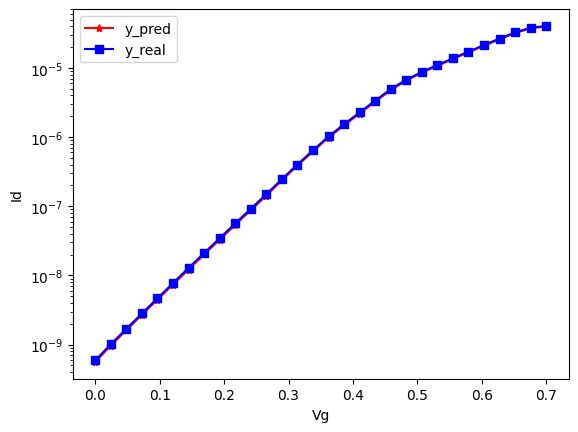

tensor([0.0214, 0.0397])


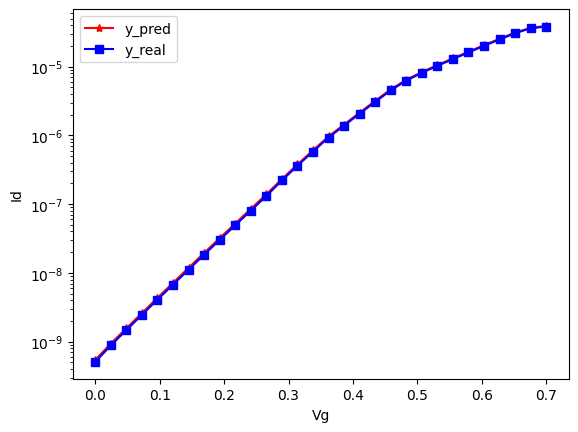

tensor([0.0223, 0.0231])


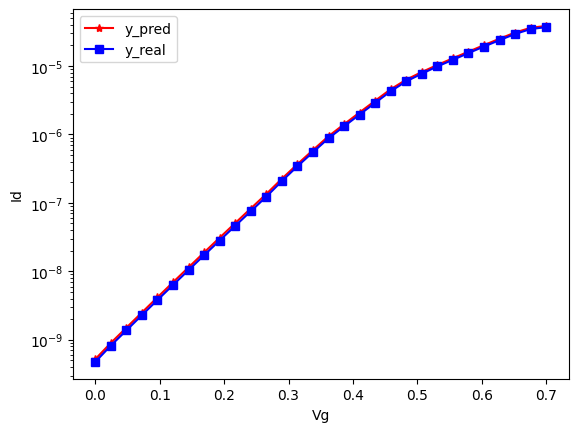

tensor([0.0174, 0.0200])


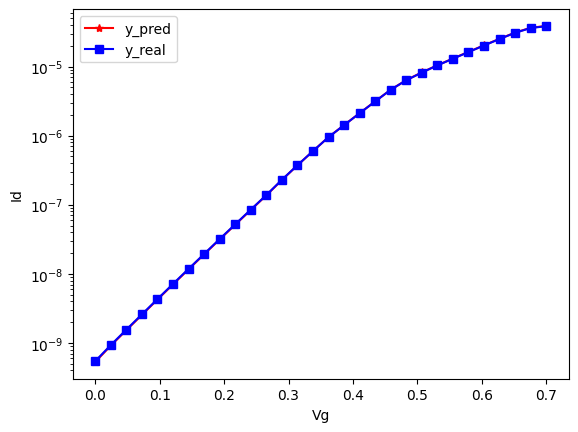

tensor([0.0192, 0.0272])


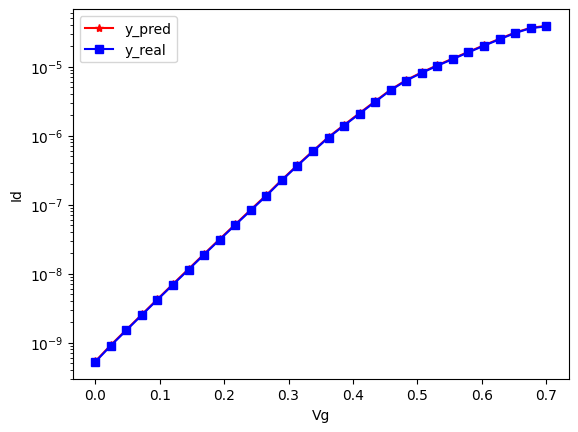

tensor([0.0187, 0.0345])


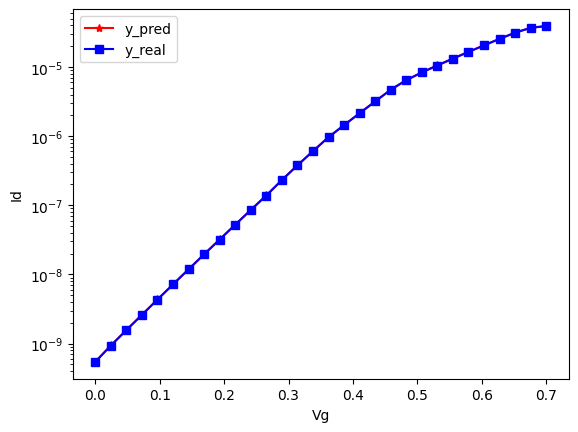

tensor([0.0120, 0.0252])


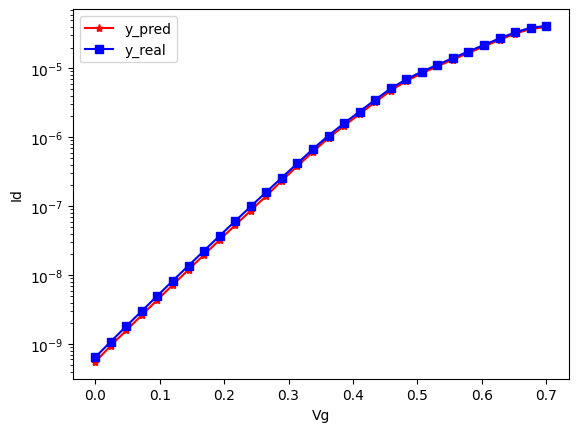

tensor([0.0124, 0.0448])


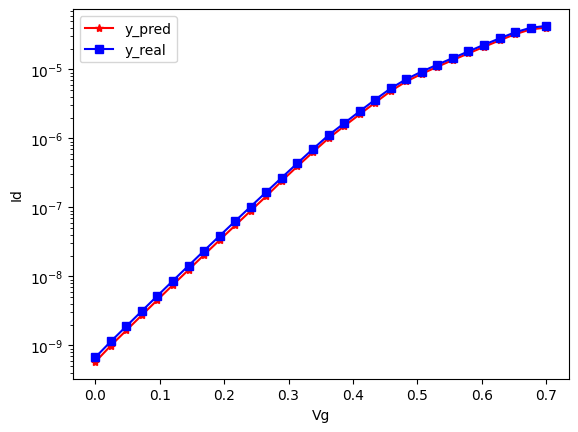

tensor([0.0228, 0.0345])


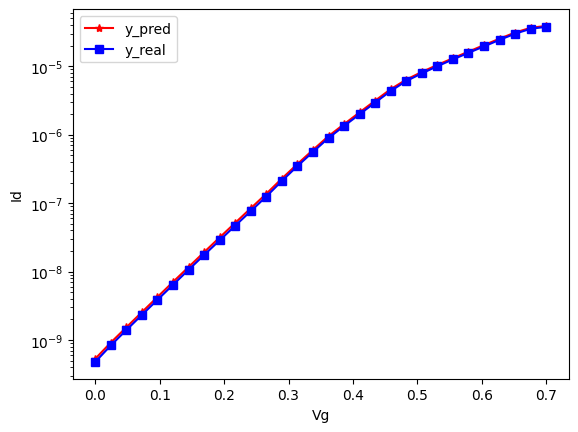

tensor([0.0187, 0.0324])


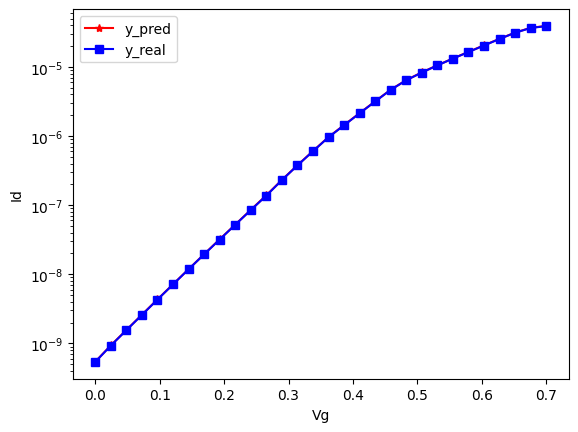

tensor([0.0165, 0.0438])


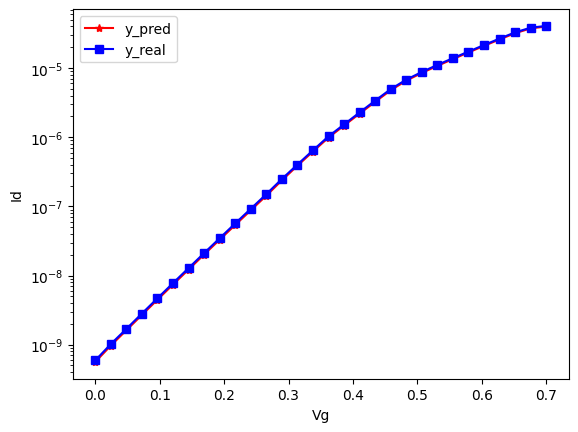

tensor([0.0174, 0.0272])


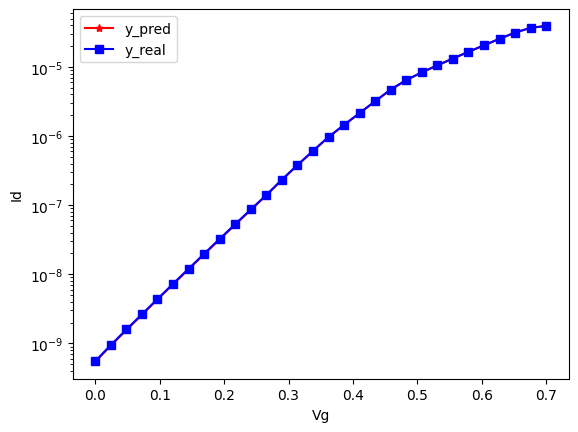

tensor([0.0133, 0.0272])


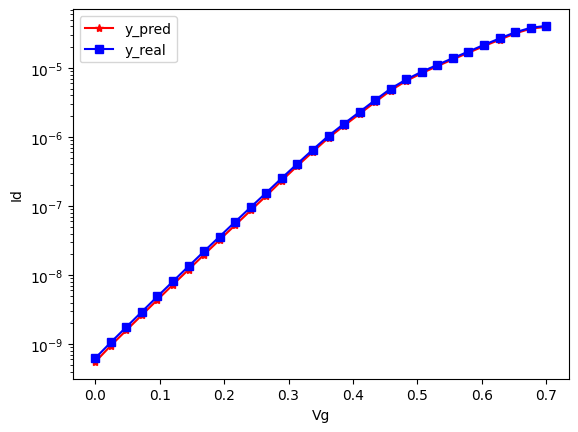

tensor([0.0183, 0.0448])


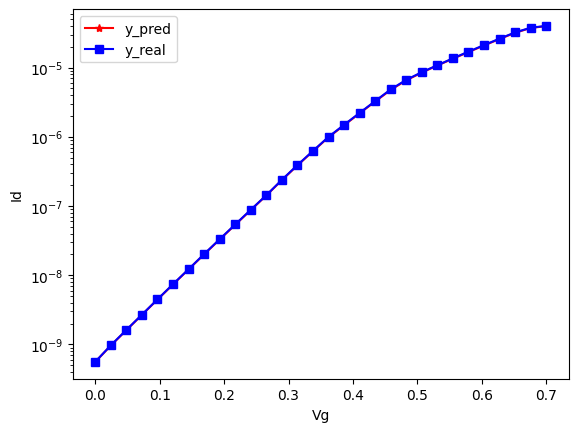

tensor([0.0205, 0.0262])


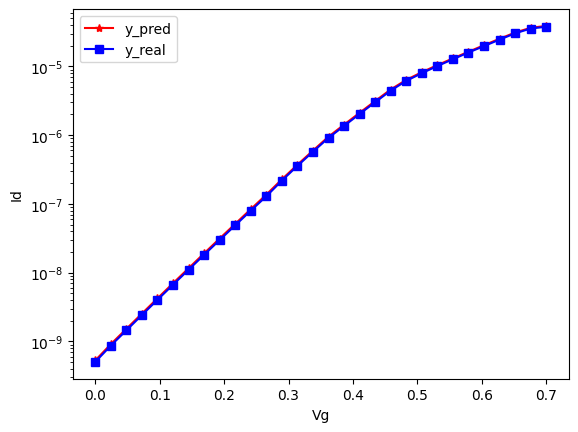

tensor([0.0250, 0.0479])


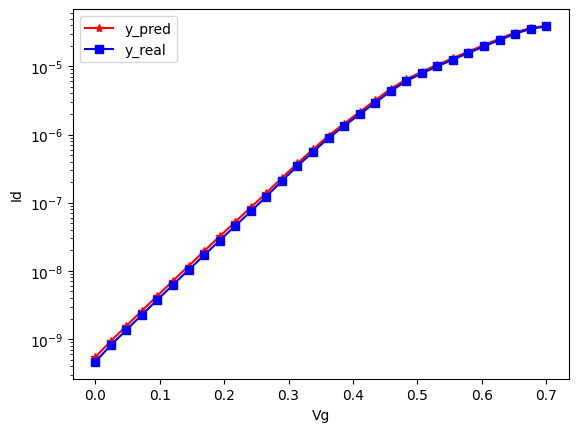

tensor([0.0205, 0.0283])


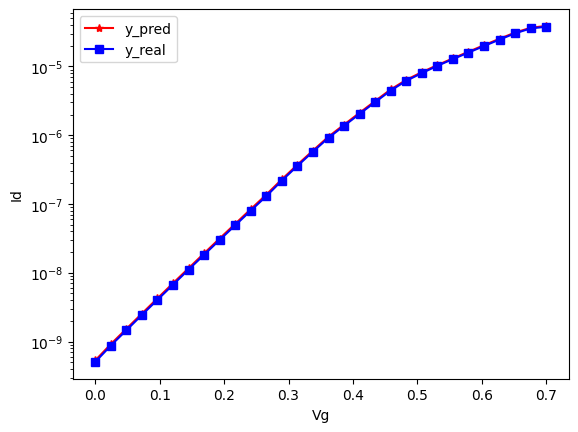

tensor([0.0232, 0.0500])


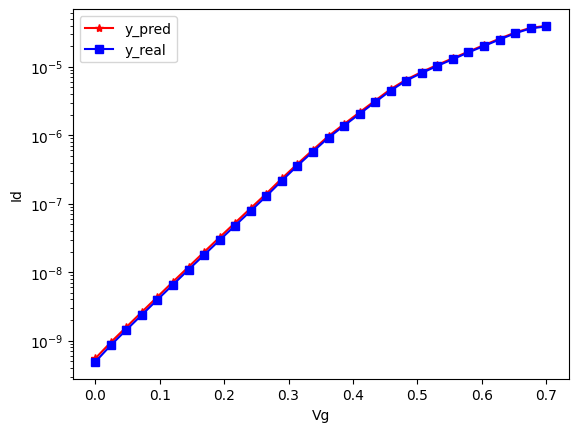

tensor([0.0120, 0.0459])


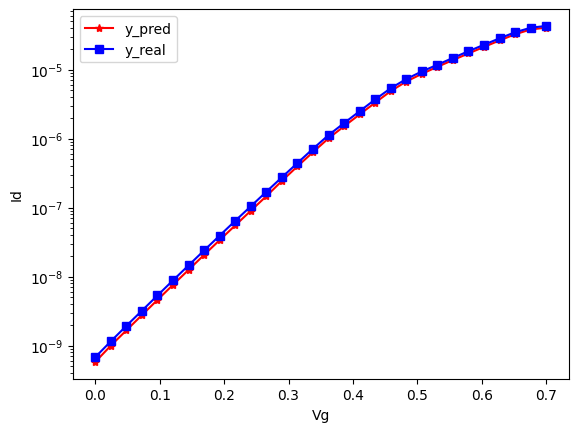

tensor([0.0129, 0.0448])


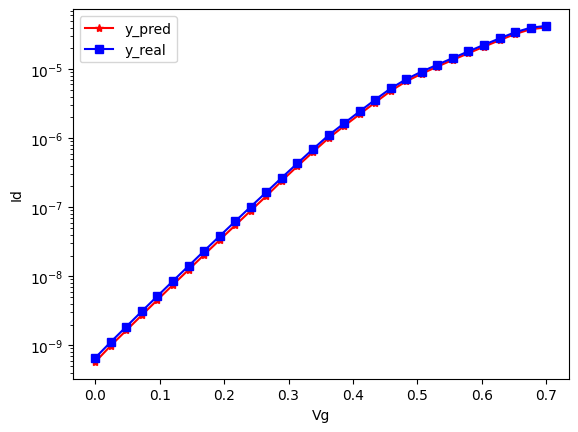

In [ ]:
import matplotlib.pyplot as plt

for i in range(len(X_test)):
    x = X_test[i]
    x = torch.Tensor(x)
    print(x)
    y_pred = model(x)
    y_pred = y_pred.detach().numpy()
    y_pred = np.exp(y_pred)
#     print(y_pred)
    plt.plot(vg_values, y_pred, "-r*")


    y_real = Y_test[i]
    y_real = np.exp(y_real)
#     print(y_real)
    plt.plot(vg_values, y_real, "-bs")
    plt.xlabel('Vg')
    plt.ylabel('Id')
    plt.yscale('log')
    plt.legend(['y_pred', 'y_real'])
    plt.show()

# New Section

In [ ]:

from bayes_opt import BayesianOptimization
import numpy as np
from scipy.interpolate import interp1d
import pickle
filename = "SRIP_xgboost_model.pkl"
model= pickle.load(open(filename, 'rb'))
model

[05:22:39] WARNING: ../src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8193161511676706, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.0005680599452081297, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.0939246836268729, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:

# Define the function that calculates the output (30 id values) for given L, W
# # Define the objective function to minimize
def objective(L,W):
    vd=0.7
    data = []
    # Iterate over the Vg values and repeat L, W, Vd for each value of Vg
    for vg in vg_values[:-1]:
        data.append([L, W, vg, vd])
    # Create a dataframe from the data list
    X = pd.DataFrame(data, columns=['L', 'W', 'vg', 'vd'])
    # print(X)
    id_values = model.predict(X)
    id_values = np.exp(id_values)


    ioff = id_values[0]  # Extract the Ioff value
    slope = ((np.log10(id_values[5])) - np.log10(id_values[2])) / (0.1207 - 0.0483)
    print(ioff, slope,ioff_target, slope_target)
    return -(np.abs(np.log(ioff_target) - np.log(ioff)) + np.abs(slope_target - slope))
# #Set the target Ioff and slope values you want to achieve
ioff_target = 5.24581877936469E-10
# ioff_target=0.000000000619
# slope_target=9.11568032
# ioff_target=0.00000000000804854
slope_target = 9.154113697259314
# slope_target=15.731689898776764
# Vth = 0.2917038312853599
# Define the bounds for L and W
pbounds = {'L': (0.015,0.025), 'W': (0.02, 0.025)}




# Define the BayesianOptimization object with the objective function and bounds
optimizer = BayesianOptimization(f=objective, pbounds=pbounds, allow_duplicate_points=True)
# Perform the optimization
optimizer.maximize(init_points=20, n_iter=200)  # Adjust the values as needed


# Get the optimal L, W values
optimal_L = optimizer.max['params']['L']
optimal_W = optimizer.max['params']['W']

# Define the pink color ANSI escape sequence
pink_color = '\033[95m'  # This represents pink color

# Print the optimal L, W values in pink color
print("Optimal L:", pink_color + str(optimal_L) + '\033[0m')  # Reset color after printing
print("Optimal W:", pink_color + str(optimal_W) + '\033[0m')  # Reset color after printing
# # Print the optimal L, W values
# print("Optimal L:", optimal_L)
# print("Optimal W:", optimal_W)

|   iter    |  target   |     L     |     W     |
-------------------------------------------------
3.887148e-11 15.192097721837504 5.24581877936469e-10 9.154113697259314
| 1         | -8.64     | 0.02004   | 0.02229   |
3.887148e-11 15.192097721837504 5.24581877936469e-10 9.154113697259314
| 2         | -8.64     | 0.01868   | 0.02373   |
3.887148e-11 15.192097721837504 5.24581877936469e-10 9.154113697259314
| 3         | -8.64     | 0.02361   | 0.0207    |
3.887148e-11 15.192097721837504 5.24581877936469e-10 9.154113697259314
| 4         | -8.64     | 0.02225   | 0.02342   |
3.887148e-11 15.192097721837504 5.24581877936469e-10 9.154113697259314
| 5         | -8.64     | 0.01987   | 0.0205    |
3.887148e-11 15.192097721837504 5.24581877936469e-10 9.154113697259314
| 6         | -8.64     | 0.02248   | 0.02358   |
3.887148e-11 15.192097721837504 5.24581877936469e-10 9.154113697259314
| 7         | -8.64     | 0.01828   | 0.02071   |
3.887148e-11 15.192097721837504 5.24581877936469e-10 

In [ ]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.5 MB/s eta 0:00:00


In [ ]:

from bayes_opt import BayesianOptimization
import numpy as np
from scipy.interpolate import interp1d
import pickle
import pandas as pd

filename = "SRIP_xgboost_model.pkl"
model = pickle.load(open(filename, 'rb'))

# Define the function that calculates the output (30 id values) for given L, W
def objective(L, W):
    vd = 0.7
    data = []
    # Iterate over the Vg values and repeat L, W, Vd for each value of Vg
    for vg in vg_values[:-1]:
        data.append([L, W, vg, vd])
    # Create a dataframe from the data list
    X = pd.DataFrame(data, columns=['L', 'W', 'vg', 'vd'])
    id_values = model.predict(X)
    id_values = np.exp(id_values)

    ioff = id_values[0]  # Extract the Ioff value
    slope = ((np.log10(id_values[5])) - np.log10(id_values[2])) / (0.1207 - 0.0483)
    return -(np.abs(np.log(ioff_target) - np.log(ioff)) + np.abs(slope_target - slope))

# Set the target Ioff and slope values you want to achieve
ioff_target = 5.24581877936469E-10
slope_target = 9.154113697259314

# Define the bounds for L and W
pbounds = {'L': (0.015, 0.025), 'W': (0.02, 0.025)}

# Define the BayesianOptimization object with the objective function and bounds
optimizer = BayesianOptimization(
    f=objective,
    pbounds=pbounds,
    verbose=2,
    random_state=1,
)

# Perform the optimization
optimizer.maximize(init_points=20, n_iter=200)

# Get the optimal L, W values
optimal_L = optimizer.max['params']['L']
optimal_W = optimizer.max['params']['W']

# Print the optimal L, W values
print("Optimal L:", optimal_L)
print("Optimal W:", optimal_W)


[05:34:55] WARNING: ../src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.

|   iter    |  target   |     L     |     W     |
-------------------------------------------------
| 1         | -8.64     | 0.01917   | 0.0236    |
| 2         | -4.597    | 0.015     | 0.02151   |
| 3         | -8.64     | 0.01647   | 0.02046   |
| 4         | -8.64     | 0.01686   | 0.02173   |
| 5         | -8.64     | 0.01897   | 0.02269   |
| 6         | -8.64     | 0.01919   | 0.02343   |
| 7         | -8.64     | 0.01704   | 0.02439   |
| 8         | -4.597    | 0.01527   | 0.02335   |
| 9         | -8.64     | 0.01917   | 0.02279   |
| 10        | -8.64     |

In [ ]:
vg_min = 0
vg_max = 0.676667
vd_min = 0.01
vd_max = 0.7
import numpy as np
# Define the problem definition for sensitivity analysis
problem = {
    'num_vars': 4,
    'names': ['L', 'W', 'vg', 'vd'],
    'bounds': [[0.015, 0.02], [0.02, 0.025], [vg_min, vg_max], [vd_min, vd_max]]
}

# Generate samples for sensitivity analysis using random sampling
param_values = np.random.rand(1000, problem['num_vars'])
for i in range(problem['num_vars']):
    param_values[:, i] = problem['bounds'][i][0] + param_values[:, i] * (problem['bounds'][i][1] - problem['bounds'][i][0])

# Perform sensitivity analysis
Y = np.zeros((param_values.shape[0], 2))
for i in range(param_values.shape[0]):
    L, W, vg, vd = param_values[i]
    Y[i, 0] = model.predict(np.array([[L, W, vg, vd]]))  # Predict drain current
    Y[i, 1] = ((np.log10(Y[i, 0])) - np.log10(Y[i, 1])) / (0.1207 - 0.0483)  # Calculate slope
# Perform Sobol sensitivity analysis
S1 = np.zeros(problem['num_vars'])
ST = np.zeros(problem['num_vars'])
S2 = np.zeros((problem['num_vars'], problem['num_vars']))

for i in range(problem['num_vars']):
    S1[i] = np.mean(Y[:, 0] * (param_values[:, i] - np.mean(param_values[:, i]))) / np.var(param_values[:, i])
    for j in range(problem['num_vars']):
        if i != j:
            S2[i, j] = np.mean((param_values[:, i] - np.mean(param_values[:, i])) * (param_values[:, j] - np.mean(param_values[:, j]))) / np.var(param_values[:, i]) / np.var(param_values[:, j])
    ST[i] = S1[i] + np.sum(S2[i, :])
# Print the sensitivity indices
print("First-order indices:", S1)
print("Total-order indices:", ST)
print("Second-order indices:", S2)

<ipython-input-32-1293d8d8726d>:23: RuntimeWarning: invalid value encountered in log10
  Y[i, 1] = ((np.log10(Y[i, 0])) - np.log10(Y[i, 1])) / (0.1207 - 0.0483)  # Calculate slope
<ipython-input-32-1293d8d8726d>:23: RuntimeWarning: divide by zero encountered in log10
  Y[i, 1] = ((np.log10(Y[i, 0])) - np.log10(Y[i, 1])) / (0.1207 - 0.0483)  # Calculate slope


First-order indices: [-303.91007407  -48.31198021   20.93250206    1.53711321]
Total-order indices: [1210.03468855 1621.06693702 -153.61634505  200.04219236]
Second-order indices: [[ 0.00000000e+00  1.57997979e+03 -9.55567386e+01  2.95217103e+01]
 [ 1.57997979e+03  0.00000000e+00 -7.92881755e+01  1.68687302e+02]
 [-9.55567386e+01 -7.92881755e+01  0.00000000e+00  2.96067004e-01]
 [ 2.95217103e+01  1.68687302e+02  2.96067004e-01  0.00000000e+00]]


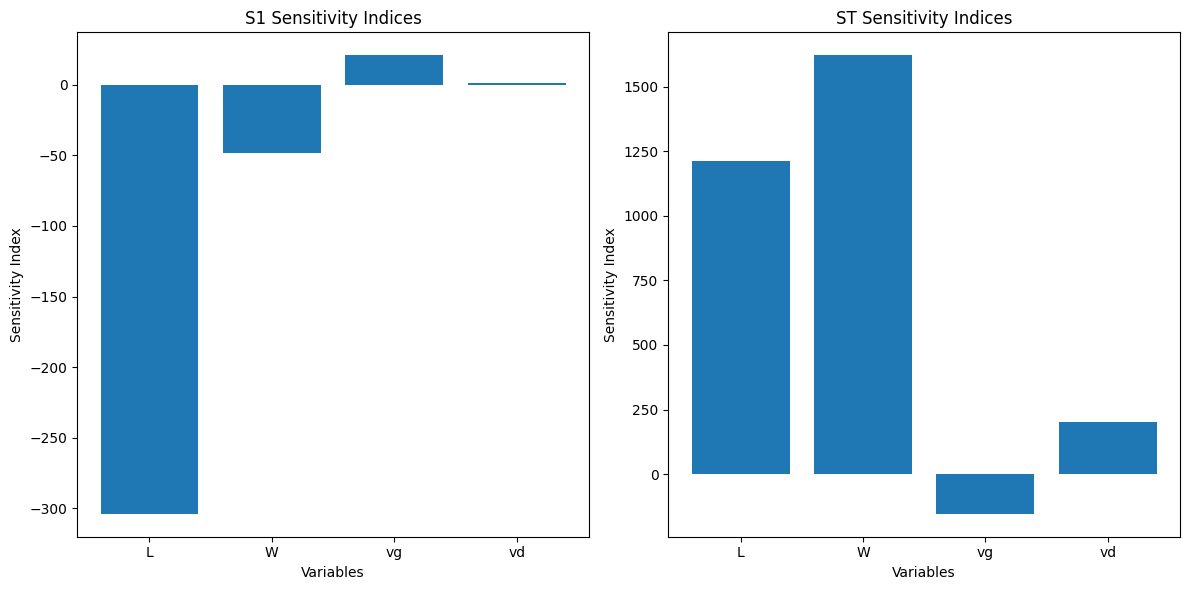

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the variable names
variable_names = ['L', 'W', 'vg', 'vd']

# Define the sensitivity indices to plot
indices_to_plot = ['S1', 'ST']

# Define the index values
index_values = [S1, ST]

# Create subplots for each sensitivity index
fig, axes = plt.subplots(nrows=1, ncols=len(indices_to_plot), figsize=(12, 6))  # Adjust figsize as needed

# Plot each sensitivity index

for i, ax in enumerate(axes):
    ax.bar(variable_names, index_values[i] )
    ax.set_title(f'{indices_to_plot[i]} Sensitivity Indices')
    ax.set_xlabel('Variables')
    ax.set_ylabel('Sensitivity Index')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot

In [ ]:
pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import pickle
from scipy.stats import norm
from scipy.interpolate import interp1d
from sklearn.utils import check_random_state
from deap import algorithms, base, creator, tools

filename = "SRIP_xgboost_model.pkl"
model = pickle.load(open(filename, 'rb'))

# Define the custom estimator class
class ObjectiveEstimator:
    def __init__(self, L=None, W=None):
        self.L = L
        self.W = W

    def fit(self, X, y=None):
        pass

    def predict(self, L, W):
        vd = 0.7
        data = []
        # Iterate over the Vg values and repeat L, W, Vd for each value of Vg
        for vg in vg_values[:-1]:
            data.append([L, W, vg, vd])
        # Create a dataframe from the data list
        X_data = pd.DataFrame(data, columns=['L', 'W', 'vg', 'vd'])
        id_values = model.predict(X_data)
        id_values = np.exp(id_values)

        ioff = id_values[0]  # Extract the Ioff value
        slope = ((np.log10(id_values[5])) - np.log10(id_values[2])) / (0.1207 - 0.0483)
        return -(np.abs(np.log(ioff_target) - np.log(ioff)) + np.abs(slope_target - slope))

    def get_params(self, deep=True):
        return {'L': self.L, 'W': self.W}

    def set_params(self, **params):
        if 'L' in params:
            self.L = params['L']
        if 'W' in params:
            self.W = params['W']
        return self

# Set the target Ioff and slope values you want to achieve
ioff_target = 5.24581877936469E-10
slope_target = 9.154113697259314

# Define the bounds for L and W
bounds = [(0.016, 0.02), (0.02, 0.05)]

# Define the objective function
def objective(params):
    L, W = params
    estimator.set_params(L=L, W=W)
    return estimator.predict(L, W),




# Create the DEAP framework
creator.create("FitnessMax", base.Fitness, weights=(-1,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform)
toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.attr_float, toolbox.attr_float), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Register the necessary functions
toolbox.register("evaluate", objective)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

# Set the random seed
random_state = check_random_state(1)
random_state.seed(1)

# Create an instance of the custom estimator
estimator = ObjectiveEstimator()

# Define the parameters for the evolutionary algorithm
pop_size = 100
num_generations = 300

# Create the initial population
population = toolbox.population(n=pop_size)

# Perform the evolution
for gen in range(num_generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.3)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for ind, fit in zip(offspring, fits):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))

# Get the best individual
best_individual = tools.selBest(population, k=1)[0]

# Print the best individual's values
optimal_L, optimal_W = best_individual
print("Best individual:")
print(f"L={optimal_L}, W={optimal_W}")


[05:57:19] WARNING: ../src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.

Best individual:
L=0.13203805445267297, W=0.06857918389667678
